<div class="usecase-title">EcoMetrix: Urban Environmental Insight System, explores various environmental datasets from the City of Melbourne, including soil sensor readings, soil sensor locations, microclimate sensor readings, and Microlabs CO2 sensor data.</div>

<div class="usecase-authors"><b>Authored by: </b>Te' Claire</div>

<div class="usecase-date"><b>Date: </b> March-July 2024</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b> Level: </b>Intermediate</div>
    <div class="usecase-skill"><b> Pre-requisite Skills: </b>Python, basic machine learning, <i>Optional</i> Google Collaborate access</div>
</div>

<div class="usecase-subsection-blurb">
  <i>Dataset 1:</i> soil-sensor-readings-historical-data
  <br>
  <a href="https://data.melbourne.vic.gov.au/explore/dataset/soil-sensor-readings-historical-data/information/" target="_blank">Dataset Link</a>
  <br>
</div>
<br>

<div class="usecase-subsection-blurb">
  <i>Dataset 2:</i> soil-sensor-locations
  <br>
  <a href="https://data.melbourne.vic.gov.au/explore/dataset/soil-sensor-locations/information/" target="_blank">Dataset Link</a>
  <br>
</div>
<br>

<div class="usecase-subsection-blurb">
  <i>Dataset 3:</i> microclimate-sensor-readings
  <br>
  <a href="https://data.melbourne.vic.gov.au/explore/dataset/microclimate-sensor-readings/information/" target="_blank">Dataset Link</a>
  <br>
</div>
<br>

<div class="usecase-subsection-blurb">
  <i>Dataset 4:</i> microlabs-co2-sensor-data
  <br>
  <a href="https://data.melbourne.vic.gov.au/explore/dataset/microlabs-co2-sensor-data/information/?sort=time&location=16,-37.8191,144.9698&basemap=mbs-7a7333/" target="_blank">Dataset Link</a>
  <br>
</div>
<br>

<div class="usecase-subsection-blurb">
  <i>Dataset 5:</i> microclimate-sensor-locations
  <br>
  <a href="https://melbournetestbed.opendatasoft.com/explore/dataset/microclimate-sensor-locations/information/" target="_blank">Dataset Link</a>
  <br>
</div>

# <div class="usecase-section-header"><h4>Project Objective, Overview & Research</h4></div>

##### Context: Australia's climate has increased in temperature since 1910 [1], we can use environmental sensor data (soil, Co2 and temperature, ambient air quality to predict impacts on the rate of population growth, economic growth and technological change. Science Matters (2022) '...spatially comprehensive map[ing] of precipitation for the entire Australian continent is crucial for research and policy making in the face of changing climate extremes and variability.'[2]

<br>

##### Objective: The goal is to integrate these datasets to monitor, analyse, and predict environmental conditions in a specific geolocation, aiding in city planning and public safety. The datasets use various metrics, such as soil moisture, temperature, salinity, ambient air quality, and CO2 levels, crucial for understanding and managing the city's environmental health. *Known previously as Soil analyses*.

<br>

* As a city planner, I need to monitor environmental sensor data to quickly identify and respond to hazardous conditions, ensuring public safety.

* As a resident of the city, I am interested in real-time environmental conditions around me, especially air quality and green space health, to plan my outdoor activities.





##### Deliverables:

1. Data Preprocessing:
- Combine datasets that can be combined to identify (data from sensors).
- Clean (normalise) the data.

2. Integrated Data Dashboard: Create a dashboard displaying data from all sensors, including soil conditions, microclimate, and CO2 levels. Visualizations include maps, charts, and graphs.

3. Predictive Analytics Model: Develop a model to predict environmental conditions and alert for anomalies or hazardous conditions based on historical and current sensor data.

4. Data Quality Report: Generate a report detailing data completeness, accuracy, and anomalies across datasets, highlighting any gaps or inconsistencies.

5. Documentation: Detailed guide on accessing, filtering, and interpreting the data, including how to use the API to download specific sensor readings.

<br>

##### References:
[1] NSW and Australian Regional Climate Modelling (NARCliM) project, 2024,https://www.climatechange.environment.nsw.gov.au/evidence-climate-change/australian-climate-change-observations

[2]Science Matters (2022), University of Melbourne, https://pursuit.unimelb.edu.au/articles/the-satellite-data-mapping-australia-s-new-climate-extremes

[3] S.Kumar, 2022, Towards Data Science,https://towardsdatascience.com/4-techniques-to-handle-missing-values-in-time-series-data-c3568589b5a8

### Part 1 Data Preprocessing:

<br>

### Part 2 Integrated Data Dashboard: Create a dashboard displaying data from all sensors, including soil conditions, microclimate, and CO2 levels. Visualizations include maps, charts, and graphs.

<br>

### Part 3 Predictive Analytics Model: Develop a model to predict environmental conditions and alert for anomalies or hazardous conditions based on historical and current sensor data.

<br>

### Part 4 Data Quality Report: Generate a report detailing data completeness, accuracy, and anomalies across datasets, highlighting any gaps or inconsistencies.

<br>

### Part 5 Documentation: Detailed guide on accessing, filtering, and interpreting the data, including how to use the API to download specific sensor readings.

### Set Up

In [ ]:
# Dependencies
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

import requests
import numpy as np
from io import StringIO

In [ ]:
# Optional code
###########################################################
# Show max width of columns in Google Collab ->
# pd.set_option('display.max_colwidth', None)
###########################################################
# Show min width of columns in Google Collab ->
pd.reset_option('display.max_colwidth')
###########################################################

In [ ]:
!pip install tqdm # Progress bar
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 1.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import osmnx as ox
import geopandas as gpd
import networkx as nx

import folium
from folium import plugins
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

from tqdm.auto import tqdm
import ipywidgets as widgets
from ipywidgets import interact

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# API Key
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/My Drive/SIT378/h.txt', 'r') as file:
    api_key = file.read().strip()

import os
api_key = os.getenv(api_key)

Mounted at /content/drive


In [ ]:
# Define the company colors
color_d = ['#08af64', '#14a38e', '#0f9295', '#056b8a', '#121212'] #Dark theme
color_l = ['#2af598', '#22e4ac', '#1bd7bb', '#14c9cb', '#0fbed8', '#08b3e5'] #Light theme

## A. Download datasets (or skip to B. if already downloaded)

###### Loaded `datasets` into dictionary:
- historical_soil_sensor = datasets['soil-sensor-readings-historical-data']
- soil_sensor_locations = datasets['soil-sensor-locations']
- microclimate_sensor_readings = datasets['microclimate-sensor-readings']
- microlabs_co2_sensor_data = datasets['microlabs-co2-sensor-data']

In [ ]:
# Download datasets
def download_dataset(api_key, dataset_id, base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'):
    format = 'csv'
    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': api_key
    }

    with requests.get(url, params=params, stream=True) as response:
        if response.status_code == 200:
            total_size = int(response.headers.get('content-length', 0))
            chunk_size = 1024  # 1KB per chunk
            progress_bar = tqdm(total=total_size, unit='iB', unit_scale=True, desc=f"Downloading {dataset_id}")

            content = bytearray()
            for chunk in response.iter_content(chunk_size=chunk_size):
                if chunk:  # filter out keep-alive new chunks
                    content.extend(chunk)
                    progress_bar.update(len(chunk))

            progress_bar.close()
            data = pd.read_csv(StringIO(content.decode('utf-8')), delimiter=';')
            return data
        else:
            print(f'Request failed with status code {response.status_code}')
            return None

# Dataset IDs
dataset_ids = [
    'microclimate-sensor-locations',
    'soil-sensor-readings-historical-data',
    'soil-sensor-locations',
    'microclimate-sensor-readings',
    'microlabs-co2-sensor-data'
]

# Initialize dictionary to hold the datasets
datasets = {}

# Download each dataset with a progress bar
for dataset_id in dataset_ids:
    datasets[dataset_id] = download_dataset(api_key, dataset_id)
    if datasets[dataset_id] is not None:
        print(f"{dataset_id} downloaded successfully.")


microclimate-sensor-locations downloaded successfully.


soil-sensor-readings-historical-data downloaded successfully.


soil-sensor-locations downloaded successfully.


microclimate-sensor-readings downloaded successfully.


microlabs-co2-sensor-data downloaded successfully.


###### View Dataset
- Sample records

In [ ]:
# soil sensor readings historical data
print(datasets['soil-sensor-readings-historical-data'].head())

                  local_time            site_name  site_id        id  \
0  2023-12-12T11:00:00+00:00  Princes Park Lawn 5    64993  20008264   
1  2023-12-12T10:15:00+00:00              Block 2   193854  20008441   
2  2023-12-12T10:30:00+00:00              Block 2   193854  20008455   
3  2023-12-12T11:30:00+00:00              Block 2   193854  20008550   
4  2023-12-12T13:00:00+00:00  Princes Park Lawn 5    64993  20008650   

   probe_id          probe_measure  soil_value  unit json_featuretype  
0   1303872  Soil Moisture 70cm #0       58.72  %VWC           Output  
1   2442542         #6 Temperature       24.70    ºC           Output  
2   2442542         #6 Temperature       24.70    ºC           Output  
3   2442542         #6 Temperature       24.60    ºC           Output  
4   1303872  Soil Moisture 70cm #0       58.76  %VWC           Output  


In [ ]:
# soil sensor locations
print(datasets['soil-sensor-locations'].head())

   site_id                        site_name    property_name   latitude  \
0    51267         Fitzroy East Water Meter  Fitzroy Gardens -37.810691   
1    51268         Fitzroy West Water Meter  Fitzroy Gardens -37.810532   
2    51809  Melbourne (Olympic Park) BOM WS     Olympic Park -37.825573   
3    64970              Princes Park Oval 2     Princes Park -37.786400   
4    64975                   McAlister Oval       Royal Park -37.778805   

    longitude                                location  
0  144.981780  -37.81069103239338, 144.98178015514114  
1  144.979830  -37.81053171390928, 144.97983004297106  
2  144.981587  -37.82557277749247, 144.98158738017247  
3  144.962590   -37.78639999998354, 144.9625900000018  
4  144.956444  -37.77880526150242, 144.95644368244822  


In [ ]:
# microclimate sensor readings
print(datasets['microclimate-sensor-readings'].head())

                  local_time       id  site_id sensor_id    value  \
0  2023-11-29T22:15:02+00:00  8110553     1011        5b    74.38   
1  2023-11-29T22:15:02+00:00  8110558     1011        5c  1010.80   
2  2023-11-29T22:15:03+00:00  8110562     1011         6     0.00   
3  2023-11-29T22:15:04+00:00  8110606     1012         6     0.00   
4  2023-11-29T22:15:11+00:00  8110489     1009        0a     5.30   

           type   units gatewayhub_id site_status  
0        TPH.RH       %       arc1055           C  
1  TPH.PRESSURE     hPa       arc1055           C  
2            WS    km/h       arc1055           C  
3            WS    km/h       arc1048           C  
4         PM2.5  ug/m^3       arc1050           C  


In [ ]:
# microlabs CO2 sensor data
print(datasets['microlabs-co2-sensor-data'].head())

         dev_id sensor_name                       time  temperature  humidity  \
0  ers-co2-9da0     ERS CO2  2022-05-04T01:40:25+00:00         20.9        47   
1  ers-co2-9da0         NaN  2022-05-04T01:33:25+00:00         20.9        47   
2  ers-co2-9da0         NaN  2022-05-04T01:34:35+00:00         20.9        47   
3  ers-co2-9da0         NaN  2022-05-04T01:31:05+00:00         20.9        47   
4  ers-co2-9da0     ERS CO2  2022-05-04T08:25:14+00:00         20.8        46   

   light  motion  visit   vdd                  lat_long    co2  
0  441.0       0      0  3601  -37.8133183, 144.9668853  507.0  
1  505.0       0      0  3599                       NaN  525.0  
2  528.0       0      0  3601                       NaN  527.0  
3  441.0       0      0  3596                       NaN  535.0  
4   90.0       0      0  3596  -37.8133183, 144.9668853  495.0  


In [ ]:
# microclimate-sensor-locations
print(datasets['microclimate-sensor-locations'].head())

   site_id gatewayhub_id site_status  last_data_local start_reading  \
0     1004       arc1048           R              NaN    2019-11-15   
1     1006       arc1112           R              NaN    2021-05-20   
2     1011       arc1055           C              NaN    2021-07-07   
3     1008       arc1045           R              NaN    2021-06-14   
4     1016       arc1049           C              NaN    2021-09-17   

  end_reading   latitude   longitude                    location  
0  2021-06-13 -37.800575  144.964635      -37.800575, 144.964635  
1  2021-06-28 -37.822486  144.952065      -37.822486, 144.952065  
2         NaN -37.822222  144.952222      -37.822222, 144.952222  
3  2021-06-20 -37.817465  144.967057  -37.81746522, 144.96705703  
4         NaN -37.812778  144.960556      -37.812778, 144.960556  


In [ ]:
# soil sensor readings historical data
print(datasets['microclimate-sensor-locations'].head())

In [ ]:
# View number of records
for dataset_id, df in datasets.items():
    if df is not None:
        num_records = df.shape[0]  # number of rows
        print(f"{dataset_id} has {num_records} records.")

microclimate-sensor-locations has 16 records.


###### Save datasets locally or on drive
- Save each dataset as a .CSV file in local file system (Google Collab) :


In [ ]:
base_path = '/content/drive/My Drive/sit378_eco_metrix/'

for dataset_id, df in datasets.items():
    if df is not None:
        filename = f"{base_path}{dataset_id}.csv"
        df.to_csv(filename, index=False)
        print(f"Saved {filename} to Google Drive.")

Saved /content/drive/My Drive/sit378_eco_metrix/microclimate-sensor-locations.csv to Google Drive.


## B. Load datasets (if not downloaded)
- Load each dataset as .CSV file in local file system (Google Collab)

In [ ]:
base_path = '/content/drive/My Drive/sit378_eco_metrix/'
datasets = {} #Dictionary

# Filenames
dataset_filenames = {
    'soil-sensor-readings-historical-data': 'soil-sensor-readings-historical-data.csv',
    'soil-sensor-locations': 'soil-sensor-locations.csv',
    'microclimate-sensor-readings': 'microclimate-sensor-readings.csv',
    'microlabs-co2-sensor-data': 'microlabs-co2-sensor-data.csv',
    'microclimate-sensor-locations': 'microclimate-sensor-locations.csv'
}

# Load each dataset into the datasets dictionary
for dataset_id, filename in dataset_filenames.items():
    full_path = f"{base_path}{filename}"
    datasets[dataset_id] = pd.read_csv(full_path)
    print(f"Loaded {dataset_id} with {datasets[dataset_id].shape[0]} records.")

Loaded soil-sensor-readings-historical-data with 2400683 records.
Loaded soil-sensor-locations with 90 records.
Loaded microclimate-sensor-readings with 56 records.
Loaded microlabs-co2-sensor-data with 207523 records.
Loaded microclimate-sensor-locations with 16 records.


### Part 1 Data Preprocessing:
- Convert to datatime
- Combine datasets to identify (data from sensors)
- Clean (normalise) the data.

In [ ]:
# Convert 'local_time' and 'time' to datetime
datasets['microclimate-sensor-readings']['local_time'] = pd.to_datetime(datasets['microclimate-sensor-readings']['local_time'])
datasets['soil-sensor-readings-historical-data']['local_time'] = pd.to_datetime(datasets['soil-sensor-readings-historical-data']['local_time'])
datasets['microlabs-co2-sensor-data']['time'] = pd.to_datetime(datasets['microlabs-co2-sensor-data']['time'])
datasets['microclimate-sensor-locations']['start_reading'] = pd.to_datetime(datasets['microclimate-sensor-locations']['start_reading'])

In [ ]:
# 'site_id' Check merge
print(datasets['soil-sensor-readings-historical-data']['site_id'].nunique()) # Total records 2400683
print(datasets['soil-sensor-locations']['site_id'].nunique()) # Total records 90
print(datasets['microclimate-sensor-readings']['site_id'].nunique()) # Total records 56
print(datasets['microclimate-sensor-locations']['site_id'].nunique()) # Total records 16

73
90
3
16


In [ ]:
# Merge operation
soil_sensor_data= pd.merge(datasets['soil-sensor-readings-historical-data'],
                         datasets['soil-sensor-locations'],
                         on='site_id',
                         how='inner')

print(soil_sensor_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400683 entries, 0 to 2400682
Data columns (total 14 columns):
 #   Column            Dtype              
---  ------            -----              
 0   local_time        datetime64[ns, UTC]
 1   site_name_x       object             
 2   site_id           int64              
 3   id                int64              
 4   probe_id          int64              
 5   probe_measure     object             
 6   soil_value        float64            
 7   unit              object             
 8   json_featuretype  object             
 9   site_name_y       object             
 10  property_name     object             
 11  latitude          float64            
 12  longitude         float64            
 13  location          object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(3), object(7)
memory usage: 256.4+ MB
None


In [ ]:
# Place each data set into pandas dataframe
microlabs_co2_sensor_data = datasets['microlabs-co2-sensor-data']
microclimate_sensor_readings = datasets['microclimate-sensor-readings']
microclimate_sensor_locations = datasets['microclimate-sensor-locations']

### Next Steps:
- Address missing values
- Check data types
- Locate/ fix dataset-specific issues
- Combine data sets for analysis (Step 2)

<br>

##### *Logic*
###### When Combine Datasets:
- If datasets are similar, you would clean before combining (filling NaN values, standardising units, converting data types).
- Or if the datasets are related, you need to understand these relationships to properly clean the data.

#####*However these datasets have different structures*
- Cleaning beforehand helps to ensure that we only combine relevant, clean data, making subsequent analysis more straightforward.
- Some datasets might have unique columns that need specific cleaning steps which are not applicable to others.

In [ ]:
# Check missing values for dataset
mval_microlabs_locations = microclimate_sensor_locations.isnull().sum()
print(f"mval_microlabs_locations: {mval_microlabs_locations}")

mval_microlabs_locations: site_id             0
gatewayhub_id       0
site_status         0
last_data_local    16
start_reading       0
end_reading         9
latitude            0
longitude           0
location            0
dtype: int64


In [ ]:
mval_microlabs_locations.dtypes

dtype('int64')

In [ ]:
# Convert the 'start_date' and 'end_date' columns to datetime
microclimate_sensor_locations['start_reading'] = pd.to_datetime(microclimate_sensor_locations['start_reading'])
# Drop
microclimate_sensor_locations = microclimate_sensor_locations.drop(columns=['last_data_local'])
microclimate_sensor_locations = microclimate_sensor_locations.drop(columns=['end_reading'])
microclimate_sensor_locations.head()

,site_id,gatewayhub_id,site_status,start_reading,latitude,longitude,location
0,1004,arc1048,R,2019-11-15,-37.800575,144.964635,"-37.800575, 144.964635"
1,1006,arc1112,R,2021-05-20,-37.822486,144.952065,"-37.822486, 144.952065"
2,1011,arc1055,C,2021-07-07,-37.822222,144.952222,"-37.822222, 144.952222"
3,1008,arc1045,R,2021-06-14,-37.817465,144.967057,"-37.81746522, 144.96705703"
4,1016,arc1049,C,2021-09-17,-37.812778,144.960556,"-37.812778, 144.960556"


### Check Missing Values: microlabs_co2_sensor_data
- sensor_name (8) - object - sensor_name is the same, copied to missing cells
- light (3) - float64 - mean all days of similar time, copied to missing cells
- lat_long (8) - object - lat_long  is the same, copied to missing cells
- co2(2) -  float64 - Dropped records

In [ ]:
microlabs_co2_sensor_data['latitude'] = '-37.8133183'
microlabs_co2_sensor_data['longitude'] = '144.9668853'
microlabs_co2_sensor_data['sensor_name'] = 'ERS CO2'
microlabs_co2_sensor_data['date'] = microlabs_co2_sensor_data['time'].dt.date
# microlabs_co2_sensor_data = microlabs_co2_sensor_data.drop(columns=['lat_long'])

In [ ]:
# Filter records where 'light' column has missing/null values
null_light_records = microlabs_co2_sensor_data[microlabs_co2_sensor_data['light'].isnull()]
# print(null_light_records)

# Check records around missing data
df = microlabs_co2_sensor_data
missing_indices = df[df['light'].isnull()].index  # Find indices where 'light' is null
first_missing_index = missing_indices[0]
context_range = 5  # How many rows before and after the missing value to display
df.loc[first_missing_index - context_range:first_missing_index + context_range]

# No exact records found Compared to other days
# 0.0 = 2023-07-21 17:10:45+00:00, 2023-06-29 21:22:18+00:00
target_time = pd.Timestamp('2023-07-16 02:26:09+00:00')
days_range = 2
different_days_records = microlabs_co2_sensor_data[(microlabs_co2_sensor_data['time'] >= target_time - pd.Timedelta(days=days_range)) &
                                                   (microlabs_co2_sensor_data['time'] <= target_time + pd.Timedelta(days=days_range))]
print(different_days_records)

              dev_id sensor_name                      time  temperature  \
123307  ers-co2-9da0     ERS CO2 2023-07-14 06:46:17+00:00         22.3   
123308  ers-co2-9da0     ERS CO2 2023-07-14 07:06:17+00:00         21.5   
123309  ers-co2-9da0     ERS CO2 2023-07-14 05:26:17+00:00         24.5   
123310  ers-co2-9da0     ERS CO2 2023-07-14 06:06:17+00:00         24.5   
123311  ers-co2-9da0     ERS CO2 2023-07-14 06:51:17+00:00         22.2   
...              ...         ...                       ...          ...   
173124  ers-co2-9da0     ERS CO2 2023-07-18 01:16:01+00:00         18.0   
173125  ers-co2-9da0     ERS CO2 2023-07-18 01:21:01+00:00         18.7   
173126  ers-co2-9da0     ERS CO2 2023-07-18 01:46:01+00:00         20.9   
173127  ers-co2-9da0     ERS CO2 2023-07-18 02:21:01+00:00         22.6   
173128  ers-co2-9da0     ERS CO2 2023-07-18 02:16:01+00:00         22.4   

        humidity  light  motion  visit   vdd    co2     latitude    longitude  
123307        37   

In [ ]:
# Find Mean of values around this time for all records
# 02:26:09+00:00
time_filter = (microlabs_co2_sensor_data['time'].dt.time >= pd.to_datetime('02:26:09').time()) & \
              (microlabs_co2_sensor_data['time'].dt.time <= pd.to_datetime('02:26:09').time())
records_around_time = microlabs_co2_sensor_data[time_filter]
mean_light_around_time = records_around_time['light'].mean()
print(f"Mean of 'light' values for all days around 02:26:09+00:00: {mean_light_around_time}\n")

# 17:10:45+00:00
time_filter = (microlabs_co2_sensor_data['time'].dt.time >= pd.to_datetime('17:10:45').time()) & \
              (microlabs_co2_sensor_data['time'].dt.time <= pd.to_datetime('17:10:45').time())
records_around_time = microlabs_co2_sensor_data[time_filter]
mean_light_around_time = records_around_time['light'].mean()
print(f"Mean of 'light' values for all days around 17:10:45+00:00: {mean_light_around_time}\n")

# 21:22:18+00:00
time_filter = (microlabs_co2_sensor_data['time'].dt.time >= pd.to_datetime('21:22:18').time()) & \
              (microlabs_co2_sensor_data['time'].dt.time <= pd.to_datetime('21:22:18').time())
records_around_time = microlabs_co2_sensor_data[time_filter]
mean_light_around_time = records_around_time['light'].mean()
print(f"Mean of 'light' values for all days around 21:22:18+00:00: {mean_light_around_time}\n")

Mean of 'light' values for all days around 02:26:09+00:00: 234.0

Mean of 'light' values for all days around 17:10:45+00:00: 0.0

Mean of 'light' values for all days around 21:22:18+00:00: 94.0



In [ ]:
# update missing values in light
replacement_values = {
    '2023-06-29 21:22:18+00:00': 94.0,
    '2023-07-21 17:10:45+00:00': 0.0,
    '2023-07-16 02:26:09+00:00': 234.0
}

# Replace
for time, value in replacement_values.items():
    microlabs_co2_sensor_data.loc[(microlabs_co2_sensor_data['time'] == time) & (microlabs_co2_sensor_data['light'].isnull()), 'light'] = value
missing_light_records = microlabs_co2_sensor_data[microlabs_co2_sensor_data['light'].isnull()]

if missing_light_records.empty:
    print("All missing 'light' records have been replaced with the specified values.")
else:
    print("Some 'light' records are still missing.")

All missing 'light' records have been replaced with the specified values.


In [ ]:
# Review Nan records 'Co2'
microlabs_co2_sensor_data.dropna(subset=['co2'], inplace=True)

# Check if the records with null 'light' values are dropped
missing_light_records_after_drop = microlabs_co2_sensor_data[microlabs_co2_sensor_data['co2'].isnull()]
microlabs_co2_sensor_data.reset_index(drop=True, inplace=True) # Reset Index

# Re Check values
mval_microlabs = microlabs_co2_sensor_data.isnull().sum()
print(f"microlabs_co2_sensor_data: {mval_microlabs}")

microlabs_co2_sensor_data: dev_id         0
sensor_name    0
time           0
temperature    0
humidity       0
light          0
motion         0
visit          0
vdd            0
co2            0
latitude       0
longitude      0
date           0
dtype: int64


### Check Missing Values: soil_sensor_data:
- local_time (928) - datetime64[ns, UTC] -
###### Last Observation Carried Forward:
###### LOCF is a simple but elegant hack where the previous non-missing values are carried or copied forward and replaced with the missing values. [3]
```
df[‘Forward_Fill’] = df[‘AvgTemperature’].ffill()
```

<br>

- soil_value (404) - float64 -
- property_name (1216248) - object -

In [ ]:
# Re Check Data
# soil_sensor_data.dtypes
# soil_sensor_data.head()
df_soil_sensor_data = soil_sensor_data.copy()
df_soil_sensor_data['local_time'] = df_soil_sensor_data['local_time'].fillna(method='ffill')

In [ ]:
# Check NaN values
total_nat_count_original = soil_sensor_data['local_time'].isna().sum()
total_nat_count = df_soil_sensor_data['local_time'].isna().sum()
print(f"Total number of NaN: {total_nat_count_original}")
print(f"Total number of NaN: {total_nat_count}")

Total number of NaN: 928
Total number of NaN: 0


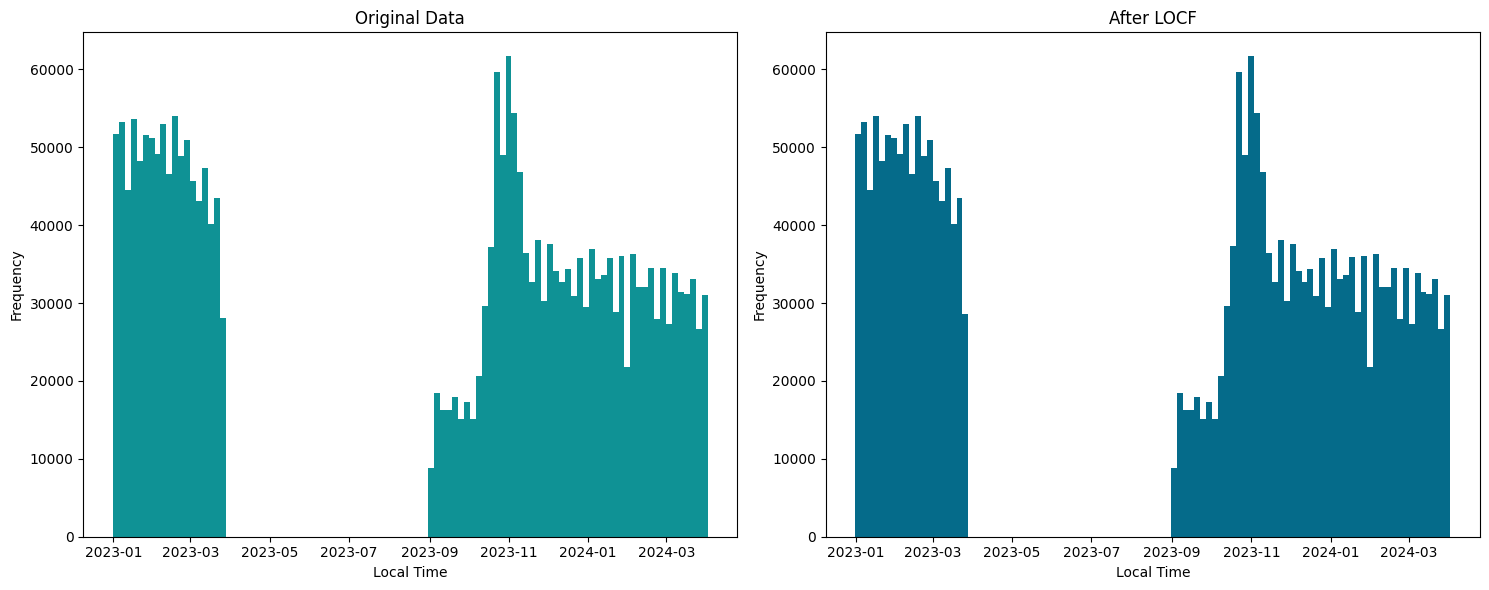

In [ ]:
# Check 'local_time' difference since LOCF method applied
# Set timezone
soil_sensor_data['local_time'] = pd.to_datetime(soil_sensor_data['local_time']).dt.tz_localize(None)
df_soil_sensor_data['local_time'] = pd.to_datetime(df_soil_sensor_data['local_time']).dt.tz_localize(None)
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# Original
axs[0].hist(soil_sensor_data['local_time'], bins=100, color=color_d[2])
axs[0].set_title('Original Data')
axs[0].set_xlabel('Local Time')
axs[0].set_ylabel('Frequency')

# New
axs[1].hist(df_soil_sensor_data['local_time'], bins=100, color=color_d[3])
axs[1].set_title('After LOCF')
axs[1].set_xlabel('Local Time')
axs[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# look at records before and after the gap ORIGINAL
soil_sensor_data = soil_sensor_data.sort_values(by='local_time') # Sort
soil_sensor_data['time_diff'] = soil_sensor_data['local_time'].diff()
gap_threshold = pd.Timedelta(days=7)
gaps = soil_sensor_data[soil_sensor_data['time_diff'] > gap_threshold]
print(gaps[['local_time', 'time_diff']])
gap_info = soil_sensor_data[soil_sensor_data['time_diff'] == pd.Timedelta('158 days 21:30:00')]
if not gap_info.empty:
    for index, row in gap_info.iterrows():
        end_of_gap = row['local_time']
        start_of_gap = end_of_gap - row['time_diff']
        print(f"Gap starts at {start_of_gap} and ends at {end_of_gap}, lasting {row['time_diff']}")

                local_time         time_diff
609666 2023-09-02 10:30:00 158 days 21:30:00
Gap starts at 2023-03-27 13:00:00 and ends at 2023-09-02 10:30:00, lasting 158 days 21:30:00


In [ ]:
# look at records before and after the gap LOCF
df_soil_sensor_data = df_soil_sensor_data.sort_values(by='local_time') # Sort
df_soil_sensor_data['time_diff'] = df_soil_sensor_data['local_time'].diff()
df_gap_threshold = pd.Timedelta(days=7)
df_gaps = df_soil_sensor_data[df_soil_sensor_data['time_diff'] > df_gap_threshold]
print(df_gaps[['local_time', 'time_diff']])
df_gap_info = df_soil_sensor_data[df_soil_sensor_data['time_diff'] == pd.Timedelta('158 days 21:30:00')]
if not df_gap_info.empty:
    for index, row in df_gap_info.iterrows():
        df_end_of_gap = row['local_time']
        df_start_of_gap = df_end_of_gap - row['time_diff']
        print(f"Gap starts at {df_start_of_gap} and ends at {df_end_of_gap}, lasting {row['time_diff']}")

                local_time         time_diff
609632 2023-09-02 10:30:00 158 days 21:30:00
Gap starts at 2023-03-27 13:00:00 and ends at 2023-09-02 10:30:00, lasting 158 days 21:30:00


#### Data Cleaning: Check missing soil values

In [ ]:
# Check soil value missing data
df = df_soil_sensor_data
missing_indices = df[df['soil_value'].isnull()].index
first_missing_index = missing_indices[0]
context_range = 5
df.loc[first_missing_index - context_range:first_missing_index + context_range]

# 'df_soil_sensor_data['soil_values'] where ['site_name_y'] = 'Block 3'
block_3_soil_values = df_soil_sensor_data[df_soil_sensor_data['site_name_y'] == 'Block 3']
print(block_3_soil_values['soil_value'])

315293    37.35
315225    27.22
306775    18.16
315274    21.96
306212    17.56
          ...  
333222    18.44
333210    17.50
333303    17.50
333320    17.90
333221    18.45
Name: soil_value, Length: 67623, dtype: float64


In [ ]:
# Find missing soil values based on each site name
# Group the DataFrame by 'site_name_y'
grouped_data = df_soil_sensor_data.groupby('site_name_y')

# Iterate through each group
for name, group in grouped_data:
    # Find rows in the group where 'soil_value' is NaN
    nan_rows = group[group['soil_value'].isna()]

    # If there are NaN rows, print them
    if not nan_rows.empty:
        print(f"NaN 'soil_value' for site '{name}':")
        print(nan_rows[['site_name_y', 'soil_value', 'local_time']])
        print()  # Print a newline for better readability between groups


NaN 'soil_value' for site 'Block 1':
       site_name_y  soil_value          local_time
359244     Block 1         NaN 2023-12-17 19:15:00
359191     Block 1         NaN 2023-12-17 19:15:00
359243     Block 1         NaN 2023-12-17 19:30:00
352619     Block 1         NaN 2023-12-17 19:30:00
352617     Block 1         NaN 2023-12-17 19:45:00
...            ...         ...                 ...
369198     Block 1         NaN 2024-02-26 20:45:00
367267     Block 1         NaN 2024-02-26 21:00:00
367278     Block 1         NaN 2024-02-26 21:00:00
367276     Block 1         NaN 2024-02-26 21:15:00
367269     Block 1         NaN 2024-02-26 21:15:00

[80 rows x 3 columns]

NaN 'soil_value' for site 'Block 2':
       site_name_y  soil_value          local_time
121989     Block 2         NaN 2023-12-17 20:15:00
110096     Block 2         NaN 2023-12-17 20:15:00
73292      Block 2         NaN 2023-12-17 20:15:00
121987     Block 2         NaN 2023-12-17 20:30:00
121994     Block 2         NaN 2023

In [ ]:
# Find soil values on other days for Block 1
block_1_data = df_soil_sensor_data[df_soil_sensor_data['site_name_y'] == 'Block 1']
date_of_interest = pd.to_datetime('2023-12-17 19:15:00')
date_range_start = date_of_interest - pd.Timedelta(days=2)
date_range_end = date_of_interest + pd.Timedelta(days=2)
surrounding_soil_values = block_1_data[(block_1_data['local_time'] >= date_range_start) &
                                       (block_1_data['local_time'] <= date_range_end) &
                                       (block_1_data['local_time'] != date_of_interest)]

print(surrounding_soil_values[['local_time', 'soil_value']])
unique_rows = surrounding_soil_values[['local_time', 'soil_value']].drop_duplicates()
print(unique_rows)

                local_time  soil_value
333479 2023-12-15 19:15:00        22.3
358468 2023-12-15 19:15:00     -9999.0
333478 2023-12-15 19:30:00        22.4
333486 2023-12-15 19:30:00     -9999.0
353417 2023-12-15 19:45:00        22.5
...                    ...         ...
361948 2023-12-19 18:45:00        21.0
353684 2023-12-19 19:00:00     -9999.0
353676 2023-12-19 19:00:00        21.1
362008 2023-12-19 19:15:00     -9999.0
353678 2023-12-19 19:15:00        21.2

[352 rows x 2 columns]
                local_time  soil_value
333479 2023-12-15 19:15:00        22.3
358468 2023-12-15 19:15:00     -9999.0
333478 2023-12-15 19:30:00        22.4
333486 2023-12-15 19:30:00     -9999.0
353417 2023-12-15 19:45:00        22.5
...                    ...         ...
361948 2023-12-19 18:45:00        21.0
353684 2023-12-19 19:00:00     -9999.0
353676 2023-12-19 19:00:00        21.1
362008 2023-12-19 19:15:00     -9999.0
353678 2023-12-19 19:15:00        21.2

[345 rows x 2 columns]


### Find Outliers
- Interquartile range (IQR) to identify values that are significantly higher or lower than the rest of the data.
- Outliers = values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the 25th and 75th percentiles of the dataset,use the interquartile range (IQR) to identify values that are significantly higher or lower than the rest of the data.

In [ ]:
# Calculate the quartiles and IQR
Q1 = unique_rows['soil_value'].quantile(0.25)
Q3 = unique_rows['soil_value'].quantile(0.75)
IQR = Q3 - Q1
# Thresholds & outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = unique_rows[(unique_rows['soil_value'] < lower_bound) | (unique_rows['soil_value'] > upper_bound)]
print(f"Outliers in the dataset: {outliers}")

# Calculate the quartiles and IQR
Q1 = df_soil_sensor_data['soil_value'].quantile(0.25)
Q3 = df_soil_sensor_data['soil_value'].quantile(0.75)
IQR = Q3 - Q1
# Thresholds & outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_soil_sensor_data[(df_soil_sensor_data['soil_value'] < lower_bound) | (df_soil_sensor_data['soil_value'] > upper_bound)]
print(f"Outliers in the dataset: {outliers}")
outliers.count()

Outliers in the dataset: Empty DataFrame
Columns: [local_time, soil_value]
Index: []
Outliers in the dataset:                  local_time            site_name_x  site_id        id  \
2184734 2022-12-31 13:00:00  Cnr Barry & Leicester    69159  15517638   
2258430 2022-12-31 13:00:00             Point Park    65002  15513658   
1127023 2022-12-31 13:00:00              Bandstand    75507  15522903   
864604  2022-12-31 13:00:00     Kings Domain North    66203  15516538   
1811593 2022-12-31 13:00:00    Flagstaff Gardens 3    64991  15520045   
...                     ...                    ...      ...       ...   
371701  2024-04-01 21:00:00                Block 1   193881  21965543   
142083  2024-04-01 21:00:00                Block 2   193854  21965503   
72853   2024-04-01 21:00:00    Princes Park Lawn 5    64993  21965571   
72941   2024-04-01 21:00:00    Princes Park Lawn 5    64993  21965620   
371700  2024-04-01 21:15:00                Block 1   193881  21965464   

         prob

local_time          74411
site_name_x         74411
site_id             74411
id                  74411
probe_id            74411
probe_measure       74411
soil_value          74411
unit                74411
json_featuretype    74411
site_name_y         74411
property_name       24307
latitude            74411
longitude           74411
location            74411
time_diff           74411
dtype: int64

In [ ]:
count_soil_values = df_soil_sensor_data['soil_value'].count()
print("Number of soil values:", count_soil_values)

Number of soil values: 2400279


In [ ]:
# Drop missing indices
missing_indices = df_soil_sensor_data[df_soil_sensor_data['soil_value'].isnull()].index
df_soil_sensor_data.drop(index=missing_indices, inplace=True)
print("Missing indices:", missing_indices)

Missing indices: Index([301504, 312897, 359244, 301509, 359191, 265994, 266005, 359243, 352619,
       301505,
       ...
        63607,  63585,  67721,  67718,  67716, 329506, 328322, 367276, 326627,
       367269],
      dtype='int64', length=404)


#### Reflection
- Data set 2400683 records
- 404 NaN records in ['soil_value']
- 74411 outliers in ['soil_value'] using IQR


### Property Values Missing
Missing 1215988  - 1184291 total = 31697

In [ ]:
df_soil_sensor_data['property_name'].head()

1876382               Royal Park
464168                       NaN
2205917    Carlton Gardens North
197768                       NaN
898892         Alexandra Gardens
Name: property_name, dtype: object

In [ ]:
# Drop missing indices
missing_indices = df_soil_sensor_data[df_soil_sensor_data['property_name'].isnull()].index

df_soil_sensor_data.drop(index=missing_indices, inplace=True)
print("Missing indices:", missing_indices)

Missing indices: Index([ 464168,  197768,  197782, 1105493,  793984, 1105510, 1105511, 1105512,
       1105513, 1105515,
       ...
        142083,  333222,  333210,  142073,  142082,  371696,  371700,  333303,
        333320,  333221],
      dtype='int64', length=1215988)


In [ ]:
property_name_values = df_soil_sensor_data['property_name'].count()
print("Number of property_name:", property_name_values)

Number of property_name: 1184291


In [ ]:
df_soil_sensor_data = df_soil_sensor_data.drop(columns=['property_name'])
df_soil_sensor_data = df_soil_sensor_data.dropna(subset=['time_diff'])

In [ ]:
# Check for missing values
mval_soil_sensor = df_soil_sensor_data.isnull().sum()
print(f"Soil sensor data missing values:\n{mval_soil_sensor}")

Soil sensor data missing values:
local_time          0
site_name_x         0
site_id             0
id                  0
probe_id            0
probe_measure       0
soil_value          0
unit                0
json_featuretype    0
site_name_y         0
latitude            0
longitude           0
location            0
time_diff           0
dtype: int64


### Re-check Values

In [ ]:
# Check missing values for dataset
mval_microlabs = microlabs_co2_sensor_data.isnull().sum()
mval_microclimate = microclimate_sensor_readings.isnull().sum()
mval_soil_sensor = df_soil_sensor_data.isnull().sum()
mval_microlabs_locations = microclimate_sensor_locations.isnull().sum()

print(f"microlabs_co2_sensor_data: {mval_microlabs}")
print(f"microclimate_sensor_readings: {mval_microclimate}")
print(f"soil_sensor_data: {mval_soil_sensor}")
print(f"soil_sensor_data: {mval_microlabs_locations}")

microlabs_co2_sensor_data: dev_id         0
sensor_name    0
time           0
temperature    0
humidity       0
light          0
motion         0
visit          0
vdd            0
co2            0
latitude       0
longitude      0
date           0
dtype: int64
microclimate_sensor_readings: local_time       0
id               0
site_id          0
sensor_id        0
value            0
type             0
units            0
gatewayhub_id    0
site_status      0
dtype: int64
soil_sensor_data: local_time          0
site_name_x         0
site_id             0
id                  0
probe_id            0
probe_measure       0
soil_value          0
unit                0
json_featuretype    0
site_name_y         0
latitude            0
longitude           0
location            0
time_diff           0
dtype: int64
soil_sensor_data: site_id          0
gatewayhub_id    0
site_status      0
start_reading    0
latitude         0
longitude        0
location         0
dtype: int64


### View data records missing/ buffer to make informed decision
- The Attribute local_time follows a regular schedule (hourly).
- Ensure data is sorted by local_time
- Set the index of the DataFrame to local_time to facilitate time-based interpolation
- Interpolate missing local_time values or reconstruct the time series to have an hourly frequency.

### View DataTypes
- df_soil_sensor_data
- microlabs_co2_sensor_data
- microclimate_sensor_readings

In [ ]:
# View data types
microlabs_co2_sensor_data.info()
microclimate_sensor_readings.info()
microclimate_sensor_locations.info()
df_soil_sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207521 entries, 0 to 207520
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   dev_id       207521 non-null  object             
 1   sensor_name  207521 non-null  object             
 2   time         207521 non-null  datetime64[ns, UTC]
 3   temperature  207521 non-null  float64            
 4   humidity     207521 non-null  int64              
 5   light        207521 non-null  float64            
 6   motion       207521 non-null  int64              
 7   visit        207521 non-null  int64              
 8   vdd          207521 non-null  int64              
 9   co2          207521 non-null  float64            
 10  latitude     207521 non-null  object             
 11  longitude    207521 non-null  object             
 12  date         207521 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(4), object(5)


In [ ]:
#Drop time_diff
df_soil_sensor_data.dropna(subset=['time_diff'], inplace=True)
df_soil_sensor_data.head()

,local_time,site_name_x,site_id,id,probe_id,probe_measure,soil_value,unit,json_featuretype,site_name_y,latitude,longitude,location,time_diff
464168,2022-12-31 13:00:00,Royal Parade CSIRO,88403,15515682,2031681,Soil Moisture 10cm (Adjusted),21.99,%VWC,SoilSensorData,Royal Parade CSIRO,-37.786120,144.959012,"-37.78611985502805, 144.95901214903452",0 days
2205917,2022-12-31 13:00:00,Carlton Gardens North,64979,15522826,1306504,Soil Moisture 50cm #0,32.63,%VWC,SoilSensorData,Carlton Gardens North,-37.801700,144.971380,"-37.801699999983285, 144.9713799999935",0 days
197768,2022-12-31 13:00:00,Princess bridge SW p10,101034,15512811,2019293,Soil Moisture 20cm (Adjusted),10.37,%VWC,SoilSensorData,Princess bridge SW p10,-37.819897,144.968499,"-37.81989716461172, 144.96849920612507",0 days
898892,2022-12-31 13:00:00,Alexandra Gardens Engineers Lawn,66195,15522987,1338740,Soil Temperature 50cm #0,21.36,ºC,SoilSensorData,Alexandra Gardens Engineers Lawn,-37.820730,144.972540,"-37.82072999998553, 144.97253999999268",0 days
197782,2022-12-31 13:00:00,Princess bridge SW p10,101034,15522558,2019280,Soil Moisture 40cm,6.62,%VWC,SoilSensorData,Princess bridge SW p10,-37.819897,144.968499,"-37.81989716461172, 144.96849920612507",0 days


In [ ]:
# Check number of unique elements # df_soil_sensor_data
unique_dev_keys_in_soil_sensor_data = df_soil_sensor_data['id'].nunique()
print(f"Number of unique 'id' values in df_soil_sensor_data: {unique_dev_keys_in_soil_sensor_data}")

total_data_soil_sensor_data = df_soil_sensor_data.shape[0]
print(f"Total number of elements in df_soil_sensor_data: {total_data_soil_sensor_data}")

Number of unique 'id' values in df_soil_sensor_data: 2400278
Total number of elements in df_soil_sensor_data: 2400278


In [ ]:
# Check number of unique elements # microclimate_sensor_readings
unique_dev_microclimate_sensor_readings = microclimate_sensor_readings['id'].nunique()
print(f"Number of unique 'id' values in unique_dev_microclimate_sensor_readings: {unique_dev_microclimate_sensor_readings}")

total_data_microclimate_sensor_readings = microclimate_sensor_readings.shape[0]
print(f"Total number of elements in unique_dev_microclimate_sensor_readings: {total_data_microclimate_sensor_readings}")

Number of unique 'id' values in unique_dev_microclimate_sensor_readings: 56
Total number of elements in unique_dev_microclimate_sensor_readings: 56


In [ ]:
# Check number of unique elements # microlabs_co2_sensor_data
unique_dev_microlabs_co2_sensor_data = microlabs_co2_sensor_data['dev_id'].nunique()
print(f"Number of unique 'id' values in microlabs_co2_sensor_data: {unique_dev_microlabs_co2_sensor_data}")

total_data_microlabs_co2_sensor_data = microlabs_co2_sensor_data.shape[0]
print(f"Total number of elements in microlabs_co2_sensor_data: {total_data_microlabs_co2_sensor_data}")

Number of unique 'id' values in microlabs_co2_sensor_data: 1
Total number of elements in microlabs_co2_sensor_data: 207521


In [ ]:
#  index for each row
microlabs_co2_sensor_data = microlabs_co2_sensor_data.reset_index(drop=True)
microlabs_co2_sensor_data.head()

,dev_id,sensor_name,time,temperature,humidity,light,motion,visit,vdd,co2,latitude,longitude,date
0,ers-co2-9da0,ERS CO2,2022-05-04 01:40:25+00:00,20.9,47,441.0,0,0,3601,507.0,-37.8133183,144.9668853,2022-05-04
1,ers-co2-9da0,ERS CO2,2022-05-04 01:33:25+00:00,20.9,47,505.0,0,0,3599,525.0,-37.8133183,144.9668853,2022-05-04
2,ers-co2-9da0,ERS CO2,2022-05-04 01:34:35+00:00,20.9,47,528.0,0,0,3601,527.0,-37.8133183,144.9668853,2022-05-04
3,ers-co2-9da0,ERS CO2,2022-05-04 01:31:05+00:00,20.9,47,441.0,0,0,3596,535.0,-37.8133183,144.9668853,2022-05-04
4,ers-co2-9da0,ERS CO2,2022-05-04 08:25:14+00:00,20.8,46,90.0,0,0,3596,495.0,-37.8133183,144.9668853,2022-05-04


In [ ]:
# Check number of unique elements # microclimate_sensor_locations
unique_dev_microclimate_sensor_locations = microclimate_sensor_locations['site_id'].nunique()
print(f"Number of unique 'id' values in microclimate_sensor_locations: {unique_dev_microclimate_sensor_locations}")

total_data_microclimate_sensor_locations = microclimate_sensor_locations.shape[0]
print(f"Total number of elements in microclimate_sensor_locations: {total_data_microclimate_sensor_locations}")

Number of unique 'id' values in microclimate_sensor_locations: 16
Total number of elements in microclimate_sensor_locations: 16


In [ ]:
microclimate_sensor_readings.head()

,local_time,id,site_id,sensor_id,value,type,units,gatewayhub_id,site_status
0,2023-11-29 22:15:02+00:00,8110553,1011,5b,74.38,TPH.RH,%,arc1055,C
1,2023-11-29 22:15:02+00:00,8110558,1011,5c,1010.80,TPH.PRESSURE,hPa,arc1055,C
2,2023-11-29 22:15:03+00:00,8110562,1011,6,0.00,WS,km/h,arc1055,C
3,2023-11-29 22:15:04+00:00,8110606,1012,6,0.00,WS,km/h,arc1048,C
4,2023-11-29 22:15:11+00:00,8110489,1009,0a,5.30,PM2.5,ug/m^3,arc1050,C


## Check duplicates for each dataset


In [ ]:
# Merge microclimate sensor readings, CO2 sensor data, and soil sensor data using the site_id column to link them.
# Check for duplicates
duplicates_co2 = microlabs_co2_sensor_data.duplicated().sum()
duplicates_microclimate = microclimate_sensor_readings.duplicated().sum()
duplicates_locations = microclimate_sensor_locations.duplicated().sum()
duplicates_soil = df_soil_sensor_data.duplicated().sum()

# Display the number of duplicate rows in each dataset
print("Number of duplicate rows in CO2 sensor data:", duplicates_co2)
print("Number of duplicate rows in microclimate sensor readings:", duplicates_microclimate)
print("Number of duplicate rows in microclimate sensor locations:", duplicates_locations)
print("Number of duplicate rows in soil sensor data:", duplicates_soil)

Number of duplicate rows in CO2 sensor data: 0
Number of duplicate rows in microclimate sensor readings: 0
Number of duplicate rows in microclimate sensor locations: 0
Number of duplicate rows in soil sensor data: 0


### Merge Datasets
- microclimate_sensor_readings
- microclimate_sensor_locations

In [ ]:
microclimate_sensor = pd.merge(microclimate_sensor_locations, microclimate_sensor_readings, on='site_id', how='outer')
# # Drop rows where all sensor data = NaN or NaT values
microclimate_sensor = microclimate_sensor.dropna(subset=['id'])

microclimate_sensor.head()

,site_id,gatewayhub_id_x,site_status_x,start_reading,latitude,longitude,location,local_time,id,sensor_id,value,type,units,gatewayhub_id_y,site_status_y
2,1011,arc1055,C,2021-07-07,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:15:02+00:00,8110553.0,5b,74.38,TPH.RH,%,arc1055,C
3,1011,arc1055,C,2021-07-07,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:15:02+00:00,8110558.0,5c,1010.80,TPH.PRESSURE,hPa,arc1055,C
4,1011,arc1055,C,2021-07-07,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:15:03+00:00,8110562.0,6,0.00,WS,km/h,arc1055,C
5,1011,arc1055,C,2021-07-07,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:30:02+00:00,8110554.0,5b,74.19,TPH.RH,%,arc1055,C
6,1011,arc1055,C,2021-07-07,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:30:11+00:00,8110523.0,0a,5.90,PM2.5,ug\/m^3,arc1055,C


In [ ]:
# Num records
number_of_records = microclimate_sensor.shape[0]

print(f"Number of records in microclimate_sensor: {number_of_records}")


Number of records in microclimate_sensor: 56


In [ ]:
microlabs_co2_sensor_data.head()

,dev_id,sensor_name,time,temperature,humidity,light,motion,visit,vdd,co2,latitude,longitude,date
0,ers-co2-9da0,ERS CO2,2022-05-04 01:40:25+00:00,20.9,47,441.0,0,0,3601,507.0,-37.8133183,144.9668853,2022-05-04
1,ers-co2-9da0,ERS CO2,2022-05-04 01:33:25+00:00,20.9,47,505.0,0,0,3599,525.0,-37.8133183,144.9668853,2022-05-04
2,ers-co2-9da0,ERS CO2,2022-05-04 01:34:35+00:00,20.9,47,528.0,0,0,3601,527.0,-37.8133183,144.9668853,2022-05-04
3,ers-co2-9da0,ERS CO2,2022-05-04 01:31:05+00:00,20.9,47,441.0,0,0,3596,535.0,-37.8133183,144.9668853,2022-05-04
4,ers-co2-9da0,ERS CO2,2022-05-04 08:25:14+00:00,20.8,46,90.0,0,0,3596,495.0,-37.8133183,144.9668853,2022-05-04


In [ ]:
microclimate_sensor.head()

,site_id,gatewayhub_id_x,site_status_x,start_reading,latitude,longitude,location,local_time,id,sensor_id,value,type,units,gatewayhub_id_y,site_status_y
2,1011,arc1055,C,2021-07-07,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:15:02+00:00,8110553.0,5b,74.38,TPH.RH,%,arc1055,C
3,1011,arc1055,C,2021-07-07,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:15:02+00:00,8110558.0,5c,1010.80,TPH.PRESSURE,hPa,arc1055,C
4,1011,arc1055,C,2021-07-07,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:15:03+00:00,8110562.0,6,0.00,WS,km/h,arc1055,C
5,1011,arc1055,C,2021-07-07,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:30:02+00:00,8110554.0,5b,74.19,TPH.RH,%,arc1055,C
6,1011,arc1055,C,2021-07-07,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:30:11+00:00,8110523.0,0a,5.90,PM2.5,ug\/m^3,arc1055,C


In [ ]:
df_soil_sensor_data.head()

,local_time,site_name_x,site_id,id,probe_id,probe_measure,soil_value,unit,json_featuretype,site_name_y,latitude,longitude,location,time_diff
464168,2022-12-31 13:00:00,Royal Parade CSIRO,88403,15515682,2031681,Soil Moisture 10cm (Adjusted),21.99,%VWC,SoilSensorData,Royal Parade CSIRO,-37.786120,144.959012,"-37.78611985502805, 144.95901214903452",0 days
2205917,2022-12-31 13:00:00,Carlton Gardens North,64979,15522826,1306504,Soil Moisture 50cm #0,32.63,%VWC,SoilSensorData,Carlton Gardens North,-37.801700,144.971380,"-37.801699999983285, 144.9713799999935",0 days
197768,2022-12-31 13:00:00,Princess bridge SW p10,101034,15512811,2019293,Soil Moisture 20cm (Adjusted),10.37,%VWC,SoilSensorData,Princess bridge SW p10,-37.819897,144.968499,"-37.81989716461172, 144.96849920612507",0 days
898892,2022-12-31 13:00:00,Alexandra Gardens Engineers Lawn,66195,15522987,1338740,Soil Temperature 50cm #0,21.36,ºC,SoilSensorData,Alexandra Gardens Engineers Lawn,-37.820730,144.972540,"-37.82072999998553, 144.97253999999268",0 days
197782,2022-12-31 13:00:00,Princess bridge SW p10,101034,15522558,2019280,Soil Moisture 40cm,6.62,%VWC,SoilSensorData,Princess bridge SW p10,-37.819897,144.968499,"-37.81989716461172, 144.96849920612507",0 days


# New datasets (saved)
- microclimate_sensor
- microlabs_co2_sensor_data
- df_soil_sensor_data

In [ ]:
# # # Save the DataFrame to a CSV file
# microclimate_sensor.to_csv('/content/drive/My Drive/sit378_eco_metrix/microclimate_sensor_cleaned.csv', index=False)
# microlabs_co2_sensor_data.to_csv('/content/drive/My Drive/sit378_eco_metrix/microlabs_co2_sensor_data_cleaned.csv', index=False)
# df_soil_sensor_data.to_csv('/content/drive/My Drive/sit378_eco_metrix/df_soil_sensor_data_cleaned.csv', index=False)

# New datasets (Load)
- microclimate_sensor
- microlabs_co2_sensor_data
- df_soil_sensor_data

In [ ]:
import pandas as pd

# Load the DataFrames from CSV files
# microclimate_sensor_cleaned = pd.read_csv('/content/drive/My Drive/sit378_eco_metrix/microclimate_sensor_cleaned.csv')
# microlabs_co2_sensor_data_cleaned = pd.read_csv('/content/drive/My Drive/sit378_eco_metrix/microlabs_co2_sensor_data_cleaned.csv')
# df_soil_sensor_data_cleaned = pd.read_csv('/content/drive/My Drive/sit378_eco_metrix/df_soil_sensor_data_cleaned.csv')


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

microclimate_sensor_df =  pd.read_csv('/content/drive/My Drive/sit378_eco_metrix/microclimate_sensor_cleaned.csv')
microlabs_co2_sensor_data_df = pd.read_csv('/content/drive/My Drive/sit378_eco_metrix/microlabs_co2_sensor_data_cleaned.csv')
df_soil_sensor_data_df =  pd.read_csv('/content/drive/My Drive/sit378_eco_metrix/df_soil_sensor_data_cleaned.csv')

# dictionary
dataframes = {
    'Microclimate Sensor': microclimate_sensor_df,
    'Microlabs CO2 Sensor Data': microlabs_co2_sensor_data_df,
    'Soil Sensor Data': df_soil_sensor_data_df
}

# Widget
dataset_dropdown = widgets.Dropdown(
    options=list(dataframes.keys()),
    description='Dataset:',
    disabled=False,
)

# update/ change menu data
def dataset_change(change):
    selected_dataset = change['new']
    display(dataframes[selected_dataset])

# Watch for changes on the dataset dropdown
dataset_dropdown.observe(dataset_change, names='value')

# Display the widget
display(dataset_dropdown)


Dropdown(description='Dataset:', options=('Microclimate Sensor', 'Microlabs CO2 Sensor Data', 'Soil Sensor Dat…

,dev_id,sensor_name,time,temperature,humidity,light,motion,visit,vdd,co2,latitude,longitude,date
0,ers-co2-9da0,ERS CO2,2022-05-04 01:40:25+00:00,20.9,47,441.0,0,0,3601,507.0,-37.813318,144.966885,2022-05-04
1,ers-co2-9da0,ERS CO2,2022-05-04 01:33:25+00:00,20.9,47,505.0,0,0,3599,525.0,-37.813318,144.966885,2022-05-04
2,ers-co2-9da0,ERS CO2,2022-05-04 01:34:35+00:00,20.9,47,528.0,0,0,3601,527.0,-37.813318,144.966885,2022-05-04
3,ers-co2-9da0,ERS CO2,2022-05-04 01:31:05+00:00,20.9,47,441.0,0,0,3596,535.0,-37.813318,144.966885,2022-05-04
4,ers-co2-9da0,ERS CO2,2022-05-04 08:25:14+00:00,20.8,46,90.0,0,0,3596,495.0,-37.813318,144.966885,2022-05-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207516,ers-co2-9da0,ERS CO2,2024-04-02 22:52:51+00:00,20.1,53,377.0,2,1,3651,425.0,-37.813318,144.966885,2024-04-02
207517,ers-co2-9da0,ERS CO2,2024-04-02 23:07:51+00:00,21.2,52,394.0,0,0,3648,417.0,-37.813318,144.966885,2024-04-02
207518,ers-co2-9da0,ERS CO2,2024-04-02 23:37:51+00:00,19.6,57,309.0,0,0,3648,410.0,-37.813318,144.966885,2024-04-02
207519,ers-co2-9da0,ERS CO2,2024-04-02 23:47:51+00:00,21.9,51,400.0,4,1,3648,415.0,-37.813318,144.966885,2024-04-02


## MicroLabs - temperature, humidity, light, co2

In [ ]:
from sklearn.preprocessing import MinMaxScaler

microlabs_co2_sensor_data_cleaned['time'] = pd.to_datetime(microlabs_co2_sensor_data_cleaned['time'])
features_to_normalize = ['temperature', 'humidity', 'light', 'co2']
scaler = MinMaxScaler() # Normalize data
norm_microlabs_co2_sensor_data = microlabs_co2_sensor_data_cleaned.copy()
norm_microlabs_co2_sensor_data[features_to_normalize] = scaler.fit_transform(norm_microlabs_co2_sensor_data[features_to_normalize])
norm_microlabs_co2_sensor_data['date'] = norm_microlabs_co2_sensor_data['time'].dt.date

print(norm_microlabs_co2_sensor_data.head())

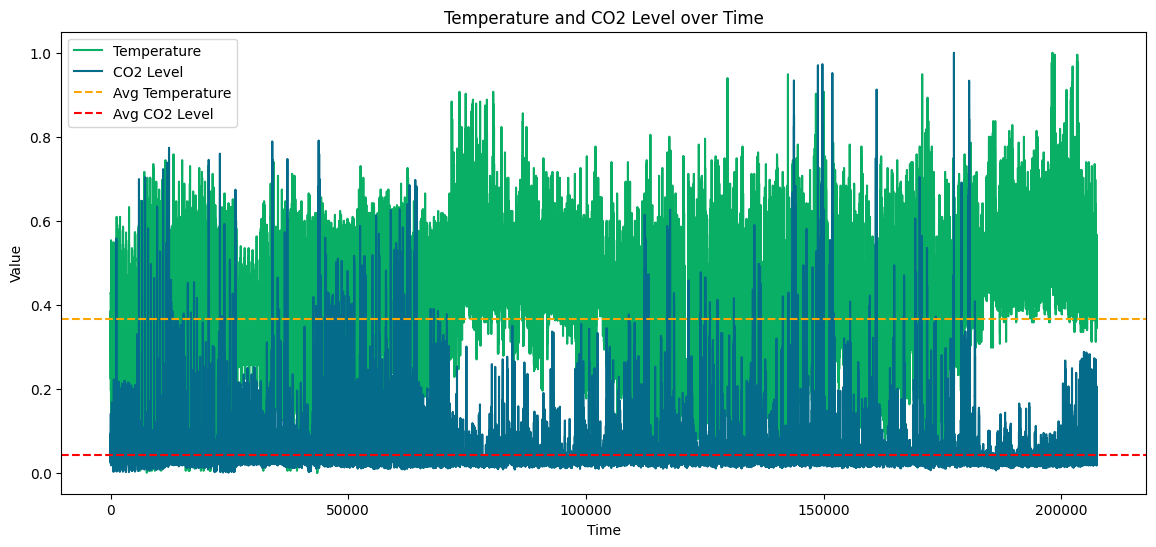

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

plt.plot(norm_microlabs_co2_sensor_data['temperature'], label='Temperature', color=color_d[0])
plt.plot(norm_microlabs_co2_sensor_data['co2'], label='CO2 Level', color=color_d[3])
plt.axhline(norm_microlabs_co2_sensor_data['temperature'].mean(), color='orange', linestyle='--', label='Avg Temperature')
plt.axhline(norm_microlabs_co2_sensor_data['co2'].mean(), color='red', linestyle='--', label='Avg CO2 Level')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Temperature and CO2 Level over Time')
plt.legend()

plt.show()


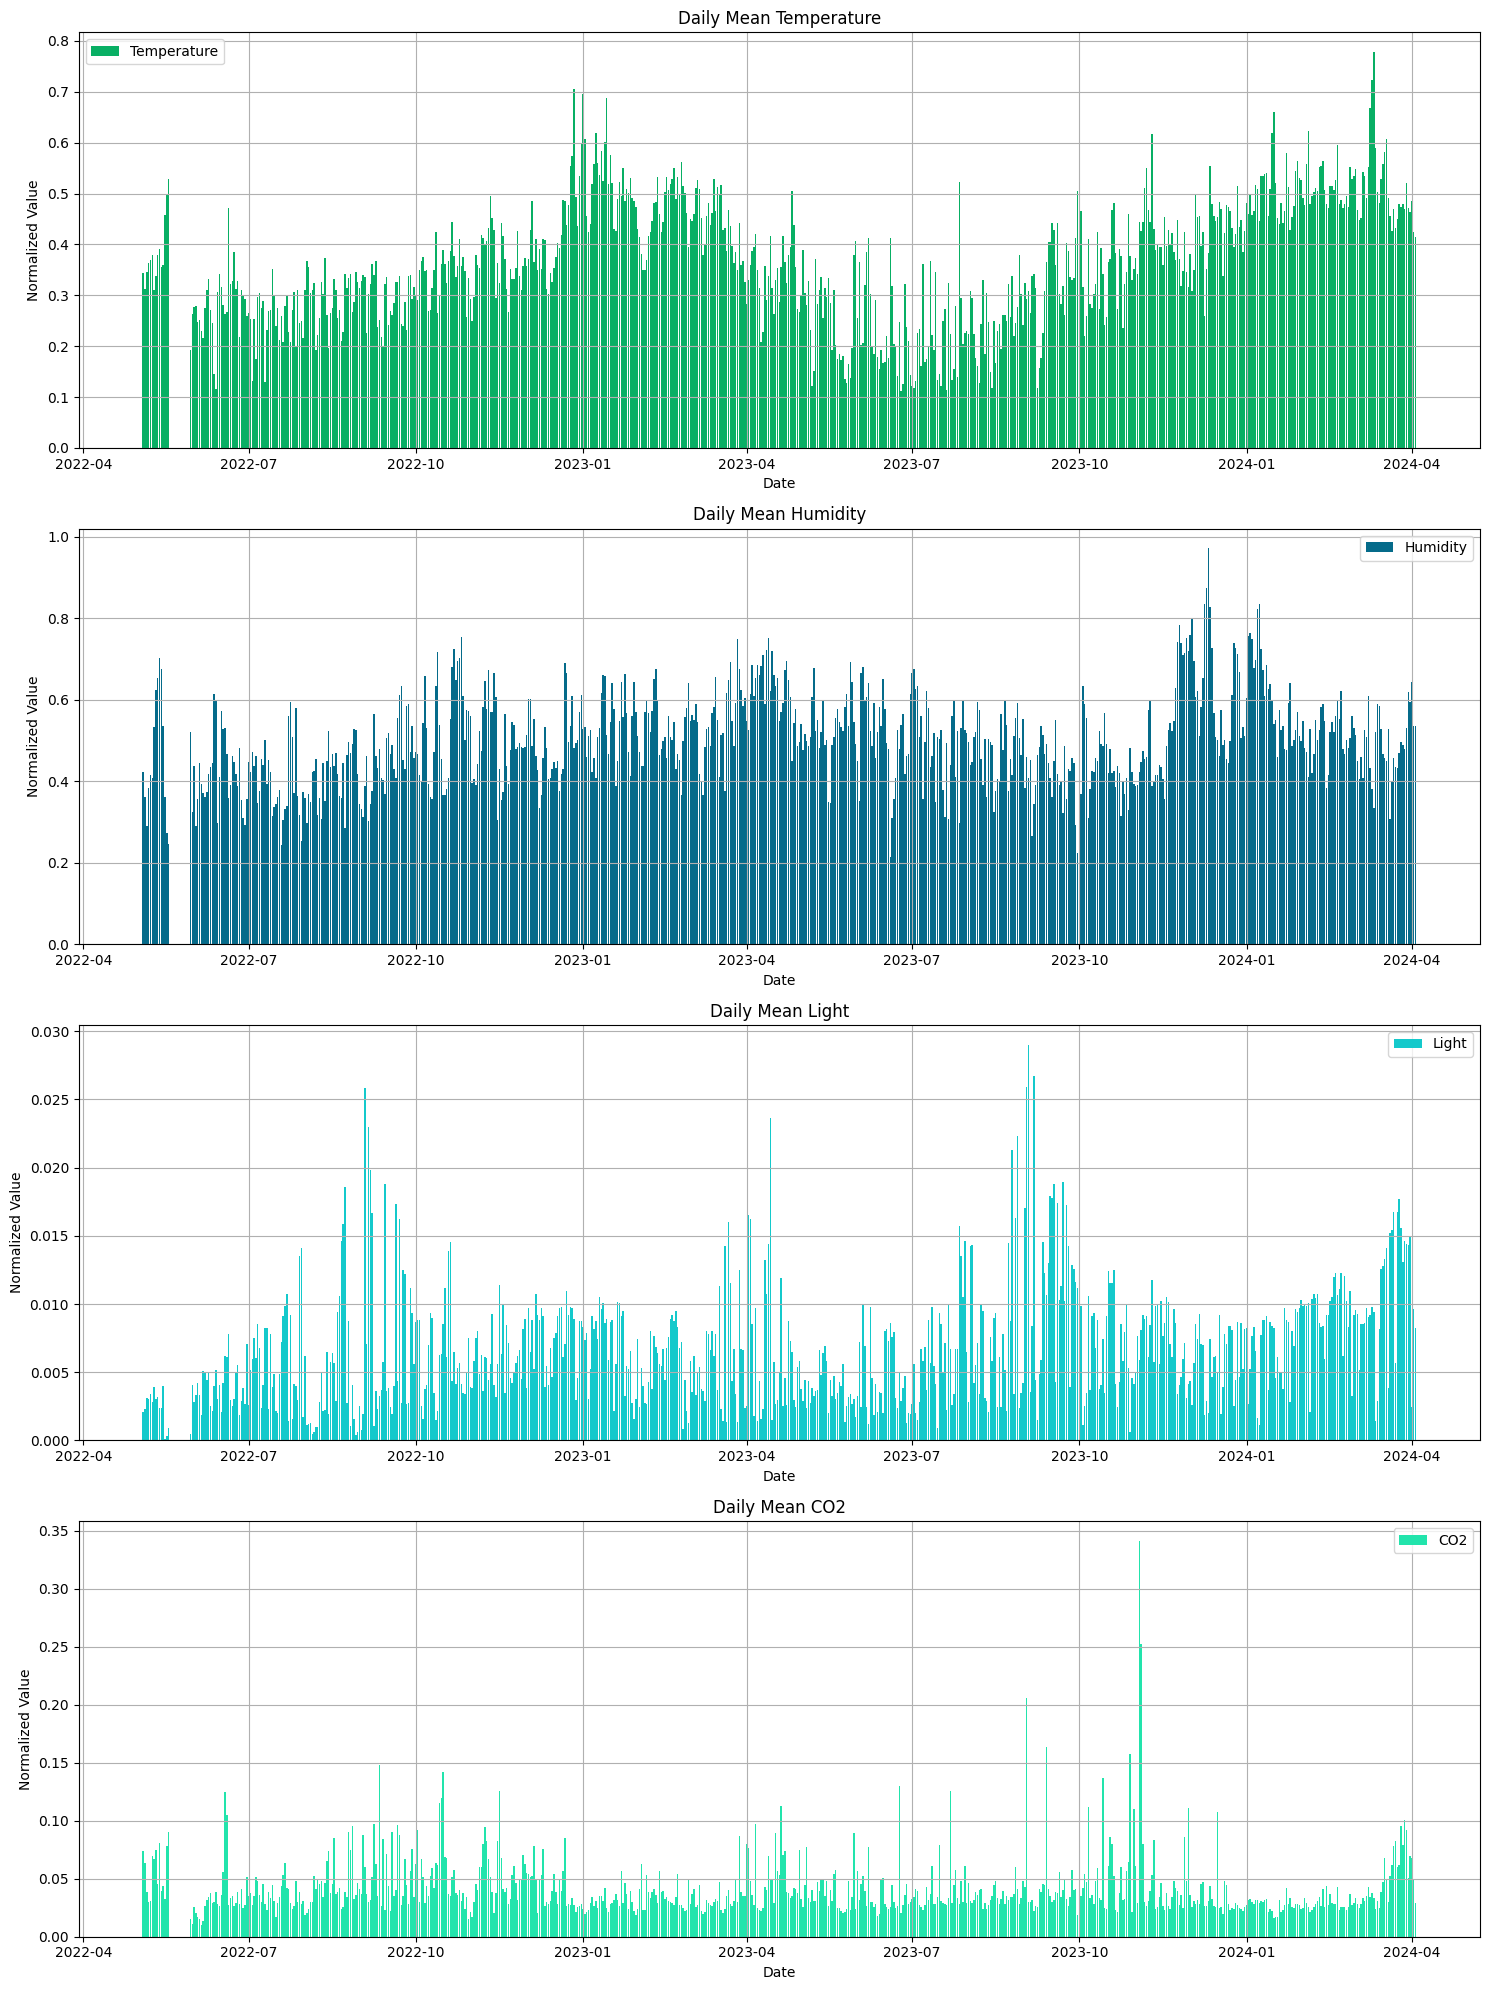

In [ ]:
# Bar plot
daily_means = norm_microlabs_co2_sensor_data.groupby('date')[features_to_normalize].mean()
fig, axs = plt.subplots(4, 1, figsize=(15, 20))
axs[0].bar(daily_means.index, daily_means['temperature'], label='Temperature', color=color_d[0])
axs[1].bar(daily_means.index, daily_means['humidity'], label='Humidity', color=color_d[3])
axs[2].bar(daily_means.index, daily_means['light'], label='Light', color=color_l[3])
axs[3].bar(daily_means.index, daily_means['co2'], label='CO2', color=color_l[1])
axs[0].set_title('Daily Mean Temperature')
axs[1].set_title('Daily Mean Humidity')
axs[2].set_title('Daily Mean Light')
axs[3].set_title('Daily Mean CO2')

for ax in axs:
    ax.set_xlabel('Date')
    ax.set_ylabel('Normalized Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


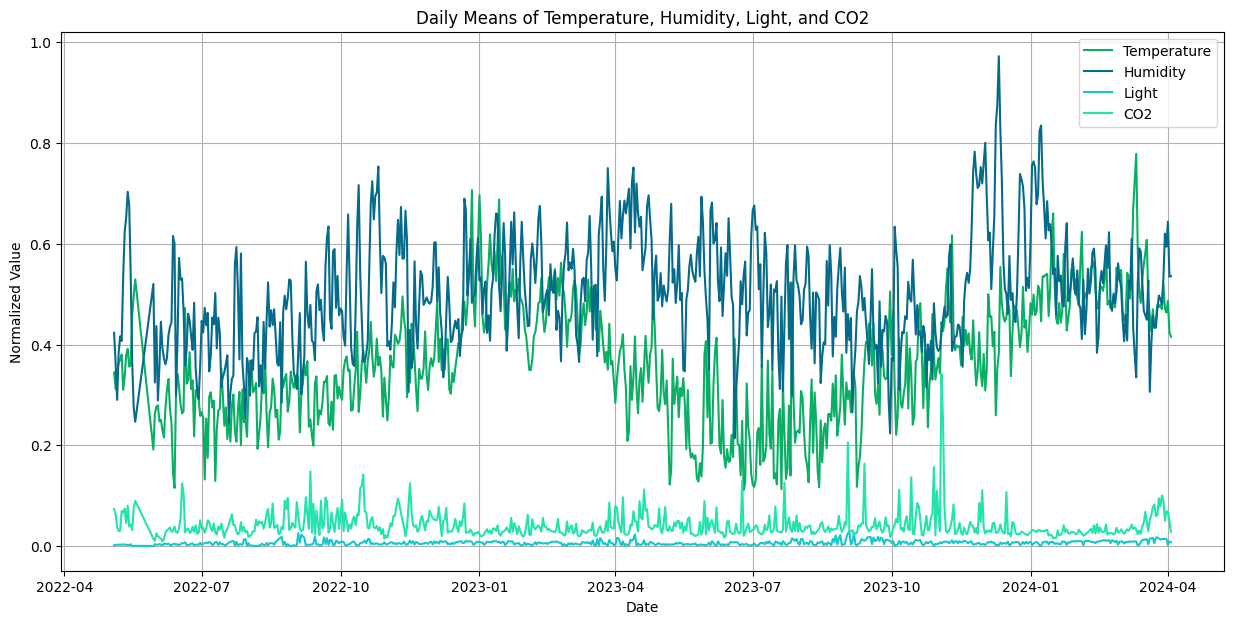

In [ ]:
# Ensure 'time' is in datetime format and create 'date' column
norm_microlabs_co2_sensor_data['time'] = pd.to_datetime(norm_microlabs_co2_sensor_data['time'])
norm_microlabs_co2_sensor_data['date'] = norm_microlabs_co2_sensor_data['time'].dt.date

# Calculate daily means for the numeric columns only
daily_means = norm_microlabs_co2_sensor_data.groupby('date')[features_to_normalize].mean()
plt.figure(figsize=(15, 7))

plt.plot(daily_means.index, daily_means['temperature'], label='Temperature', color=color_d[0])
plt.plot(daily_means.index, daily_means['humidity'], label='Humidity', color=color_d[3])
plt.plot(daily_means.index, daily_means['light'], label='Light', color=color_l[3])
plt.plot(daily_means.index, daily_means['co2'], label='CO2', color=color_l[1])
plt.title('Daily Means of Temperature, Humidity, Light, and CO2')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()

color_original = color_d[2]
color_locf = color_d[1]


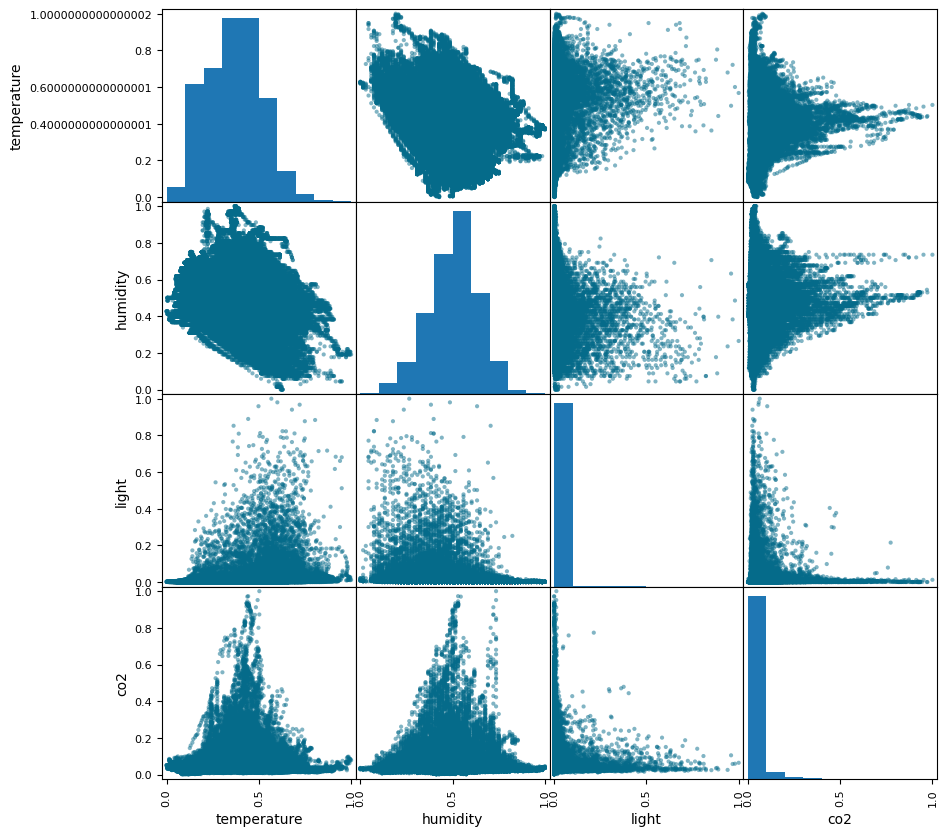

In [ ]:
# Correlation Analysis To see how different variables relate to each other
pd.plotting.scatter_matrix(norm_microlabs_co2_sensor_data[['temperature', 'humidity', 'light', 'co2']], color=color_d[3], figsize=(10, 10))
plt.show()

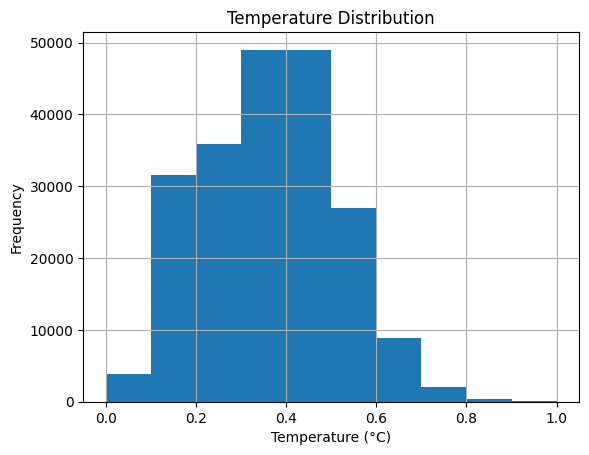

In [ ]:
# Histograms distribution temperature, humidity, or CO2 levels.
norm_microlabs_co2_sensor_data['temperature'].hist()
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

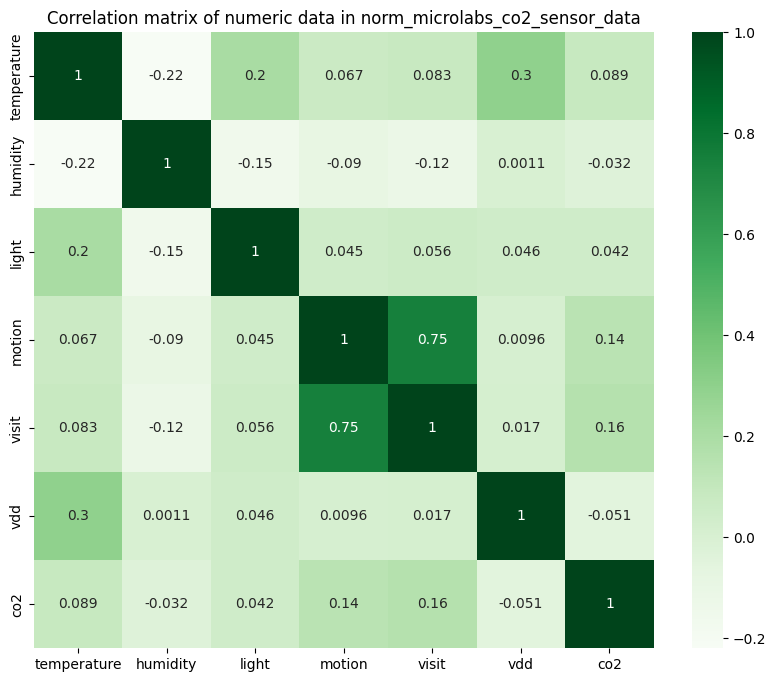

In [ ]:
# Heat Map for Correlation
# Ref https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
# Numeric columns for correlation
numeric_data = norm_microlabs_co2_sensor_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation matrix of numeric data in norm_microlabs_co2_sensor_data')
plt.show()

## microclimate Sensor and Microlabs Co2 Senor

In [ ]:
# Map the latitude and longitude from both datasets
import folium
coords_microclimate = [-37.800575, 144.964635]
coords_norm_microlabs = [-37.8133183, 144.9668853]

# Create a map centered around the average of the given coordinates
map_center = [(coords_microclimate[0] + coords_norm_microlabs[0]) / 2,
              (coords_microclimate[1] + coords_norm_microlabs[1]) / 2]
map = folium.Map(location=map_center, zoom_start=14)

# Add markers for each dataset's location
folium.Marker(coords_microclimate, popup='Microclimate Sensor', tooltip='Microclimate Sensor').add_to(map)
folium.Marker(coords_norm_microlabs, popup='Norm Microlabs CO2 Sensor', tooltip='Norm Microlabs CO2 Sensor').add_to(map)
map

In [ ]:
import math
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0 # Radius of the Earth in kilometers

    # Convert lat & long degrees to radians
    lat1_rad, lon1_rad = math.radians(lat1), math.radians(lon1)
    lat2_rad, lon2_rad = math.radians(lat2), math.radians(lon2)
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c # Distance in kilometers
    return distance

# Distance between the two sensor locations
distance = haversine(coords_microclimate[0], coords_microclimate[1],
                     coords_norm_microlabs[0], coords_norm_microlabs[1])

print(f'Distance between Sensor locations: {distance}')

Distance between Sensor locations: 1.4307148758774588


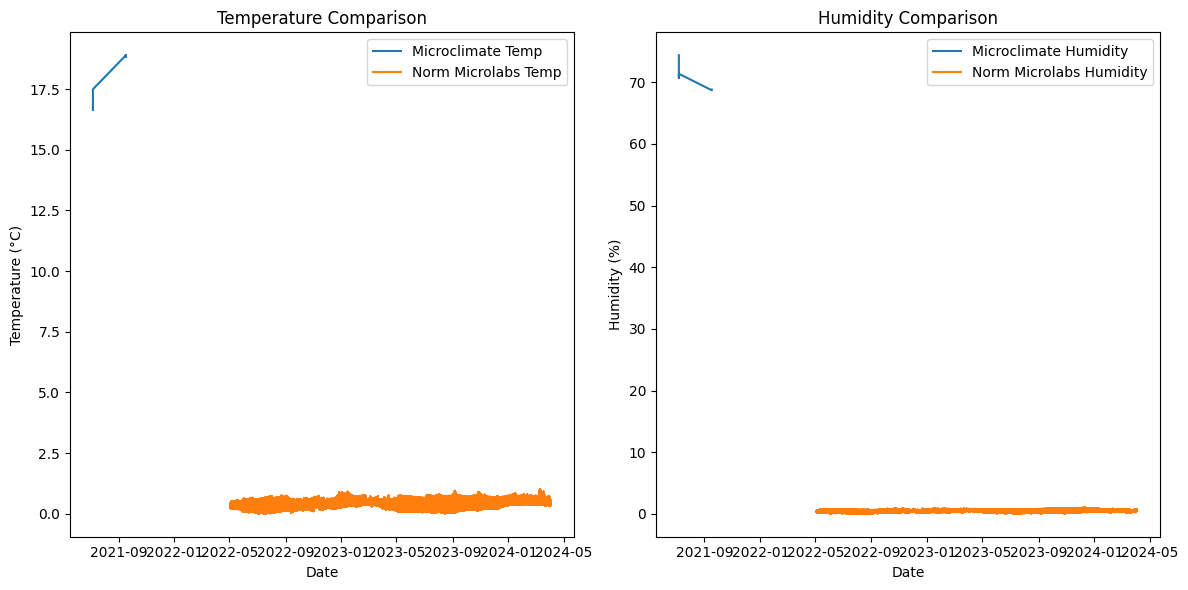

In [ ]:
## Compare both datasets
micro_temp = microclimate_sensor_cleaned[microclimate_sensor_cleaned['type'] == 'TPH.TEMP']
norm_temp = norm_microlabs_co2_sensor_data[['date', 'temperature']]
micro_humidity = microclimate_sensor_cleaned[microclimate_sensor_cleaned['type'] == 'TPH.RH']
norm_humidity = norm_microlabs_co2_sensor_data[['date', 'humidity']]
plt.figure(figsize=(12, 6))

# Temperature
plt.subplot(1, 2, 1)
plt.plot(micro_temp['date'], micro_temp['value'], label='Microclimate Temp')
plt.plot(norm_temp['date'], norm_temp['temperature'], label='Norm Microlabs Temp')
plt.title('Temperature Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Humidity comparison
plt.subplot(1, 2, 2)
plt.plot(micro_humidity['date'], micro_humidity['value'], label='Microclimate Humidity')
plt.plot(norm_humidity['date'], norm_humidity['humidity'], label='Norm Microlabs Humidity')
plt.title('Humidity Comparison')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Compare types
# microclimate_sensor_cleaned
temperature_types_micro = microclimate_sensor_cleaned[
    microclimate_sensor_cleaned['type'].str.contains('TEMP')
][['date', 'type', 'value', 'units']]

print("Microclimate Sensor Cleaned - Temperature Data:")
print(temperature_types_micro)


Microclimate Sensor Cleaned - Temperature Data:
          date      type  value units
11  2021-07-07  TPH.TEMP  16.81     C
18  2021-07-07  TPH.TEMP  16.64     C
22  2021-07-07  TPH.TEMP  17.07     C
24  2021-07-07  TPH.TEMP  17.49     C
50  2021-09-17  TPH.TEMP  18.89     C
55  2021-09-17  TPH.TEMP  18.82     C
59  2021-09-17  TPH.TEMP  18.87     C
65  2021-09-17  TPH.TEMP  18.89     C


In [ ]:
# microlabs
temperature_data_norm = microlabs_co2_sensor_data_cleaned[['time', 'temperature']]

print("\nNorm Microlabs CO2 Sensor Data - Temperature Data:")
print(temperature_data_norm)


Norm Microlabs CO2 Sensor Data - Temperature Data:
                            time  temperature
0      2022-05-04 01:40:25+00:00     0.427907
1      2022-05-04 01:33:25+00:00     0.427907
2      2022-05-04 01:34:35+00:00     0.427907
3      2022-05-04 01:31:05+00:00     0.427907
4      2022-05-04 08:25:14+00:00     0.423256
...                          ...          ...
207518 2024-04-02 22:52:51+00:00     0.390698
207519 2024-04-02 23:07:51+00:00     0.441860
207520 2024-04-02 23:37:51+00:00     0.367442
207521 2024-04-02 23:47:51+00:00     0.474419
207522 2024-04-02 23:52:50+00:00     0.441860

[207523 rows x 2 columns]


## microclimate_sensor

In [ ]:
# Check null values in the dataframe & Drop
columns_with_null = microclimate_sensor_cleaned.isnull().any()
print(columns_with_null[columns_with_null].index.tolist())
microclimate_sensor_cleaned = microclimate_sensor_cleaned.drop(columns=['end_reading'])
microclimate_sensor_cleaned.head()

['end_reading']


,site_id,gatewayhub_id_x,site_status_x,start_reading,latitude,longitude,location,local_time,id,sensor_id,value,type,units,gatewayhub_id_y,site_status_y,time,date
2,1011,arc1055,C,2021-07-07 00:00:00+00:00,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:15:02+00:00,8110553.0,5b,74.38,TPH.RH,%,arc1055,C,2021-07-07 00:00:00+00:00,2021-07-07
3,1011,arc1055,C,2021-07-07 00:00:00+00:00,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:15:02+00:00,8110558.0,5c,1010.80,TPH.PRESSURE,hPa,arc1055,C,2021-07-07 00:00:00+00:00,2021-07-07
4,1011,arc1055,C,2021-07-07 00:00:00+00:00,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:15:03+00:00,8110562.0,6,0.00,WS,km/h,arc1055,C,2021-07-07 00:00:00+00:00,2021-07-07
5,1011,arc1055,C,2021-07-07 00:00:00+00:00,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:30:02+00:00,8110554.0,5b,74.19,TPH.RH,%,arc1055,C,2021-07-07 00:00:00+00:00,2021-07-07
6,1011,arc1055,C,2021-07-07 00:00:00+00:00,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:30:11+00:00,8110523.0,0a,5.90,PM2.5,ug\/m^3,arc1055,C,2021-07-07 00:00:00+00:00,2021-07-07


In [ ]:
# Create date column
microclimate_sensor_cleaned['time'] = pd.to_datetime(microclimate_sensor_cleaned['start_reading'])
microclimate_sensor_cleaned['date'] = microclimate_sensor_cleaned['time'].dt.date

In [ ]:
# Count null values 'id' column
null_ids_count = microclimate_sensor_cleaned['id'].isnull().sum()
print("Number of null values in the 'id' column:", null_ids_count)
null_id_records = microclimate_sensor_cleaned[microclimate_sensor_cleaned['id'].isnull()]
print(null_id_records)

# Drop records null
microclimate_sensor_cleaned = microclimate_sensor_cleaned.dropna(subset=['id'])
null_ids_count_after = microclimate_sensor_cleaned['id'].isnull().sum()
print("Number of null values in the 'id' column after cleaning:", null_ids_count_after)

Number of null values in the 'id' column: 0
Empty DataFrame
Columns: [site_id, gatewayhub_id_x, site_status_x, start_reading, end_reading, latitude, longitude, location, local_time, id, sensor_id, value, type, units, gatewayhub_id_y, site_status_y, time, date]
Index: []
Number of null values in the 'id' column after cleaning: 0


In [ ]:
unique_site_status_x = microclimate_sensor_cleaned['site_status_x'].unique()
unique_id = microclimate_sensor_cleaned['id'].unique()
unique_type = microclimate_sensor_cleaned['type'].unique()
unique_units = microclimate_sensor_cleaned['units'].unique()
print("Unique site_status_x:", unique_site_status_x)
print("Unique id:", unique_id)
print("Unique type:", unique_type)
print("Unique units:", unique_units)
unique_id

Unique site_status_x: ['C']
Unique id: [8110553. 8110558. 8110562. 8110554. 8110523. 8110532. 8110556. 8110565.
 8110522. 8110549. 8110555. 8110560. 8110564. 8110524. 8110525. 8110534.
 8110548. 8110531. 8110559. 8110563. 8110550. 8110533. 8110551. 8110561.
 8110489. 8110490. 8110500. 8110491. 8110492. 8110499. 8110501. 8110502.
 8110606. 8110576. 8110604. 8110605. 8110569. 8110566. 8110607. 8110567.
 8110594. 8110577. 8110600. 8110609. 8110578. 8110592. 8110597. 8110602.
 8110575. 8110593. 8110598. 8110603. 8110599. 8110608. 8110568. 8110595.]
Unique type: ['TPH.RH' 'TPH.PRESSURE' 'WS' 'PM2.5' 'PM10' 'TPH.TEMP']
Unique units: ['%' 'hPa' 'km/h' 'ug\\/m^3' 'C' 'ug/m^3']


array([8110553., 8110558., 8110562., 8110554., 8110523., 8110532.,
       8110556., 8110565., 8110522., 8110549., 8110555., 8110560.,
       8110564., 8110524., 8110525., 8110534., 8110548., 8110531.,
       8110559., 8110563., 8110550., 8110533., 8110551., 8110561.,
       8110489., 8110490., 8110500., 8110491., 8110492., 8110499.,
       8110501., 8110502., 8110606., 8110576., 8110604., 8110605.,
       8110569., 8110566., 8110607., 8110567., 8110594., 8110577.,
       8110600., 8110609., 8110578., 8110592., 8110597., 8110602.,
       8110575., 8110593., 8110598., 8110603., 8110599., 8110608.,
       8110568., 8110595.])

In [ ]:
microclimate_sensor_cleaned.head()

,site_id,gatewayhub_id_x,site_status_x,start_reading,latitude,longitude,location,local_time,id,sensor_id,value,type,units,gatewayhub_id_y,site_status_y,time,date
2,1011,arc1055,C,2021-07-07 00:00:00+00:00,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:15:02+00:00,8110553.0,5b,74.38,TPH.RH,%,arc1055,C,2021-07-07 00:00:00+00:00,2021-07-07
3,1011,arc1055,C,2021-07-07 00:00:00+00:00,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:15:02+00:00,8110558.0,5c,1010.80,TPH.PRESSURE,hPa,arc1055,C,2021-07-07 00:00:00+00:00,2021-07-07
4,1011,arc1055,C,2021-07-07 00:00:00+00:00,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:15:03+00:00,8110562.0,6,0.00,WS,km/h,arc1055,C,2021-07-07 00:00:00+00:00,2021-07-07
5,1011,arc1055,C,2021-07-07 00:00:00+00:00,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:30:02+00:00,8110554.0,5b,74.19,TPH.RH,%,arc1055,C,2021-07-07 00:00:00+00:00,2021-07-07
6,1011,arc1055,C,2021-07-07 00:00:00+00:00,-37.822222,144.952222,"-37.822222, 144.952222",2023-11-29 22:30:11+00:00,8110523.0,0a,5.90,PM2.5,ug\/m^3,arc1055,C,2021-07-07 00:00:00+00:00,2021-07-07


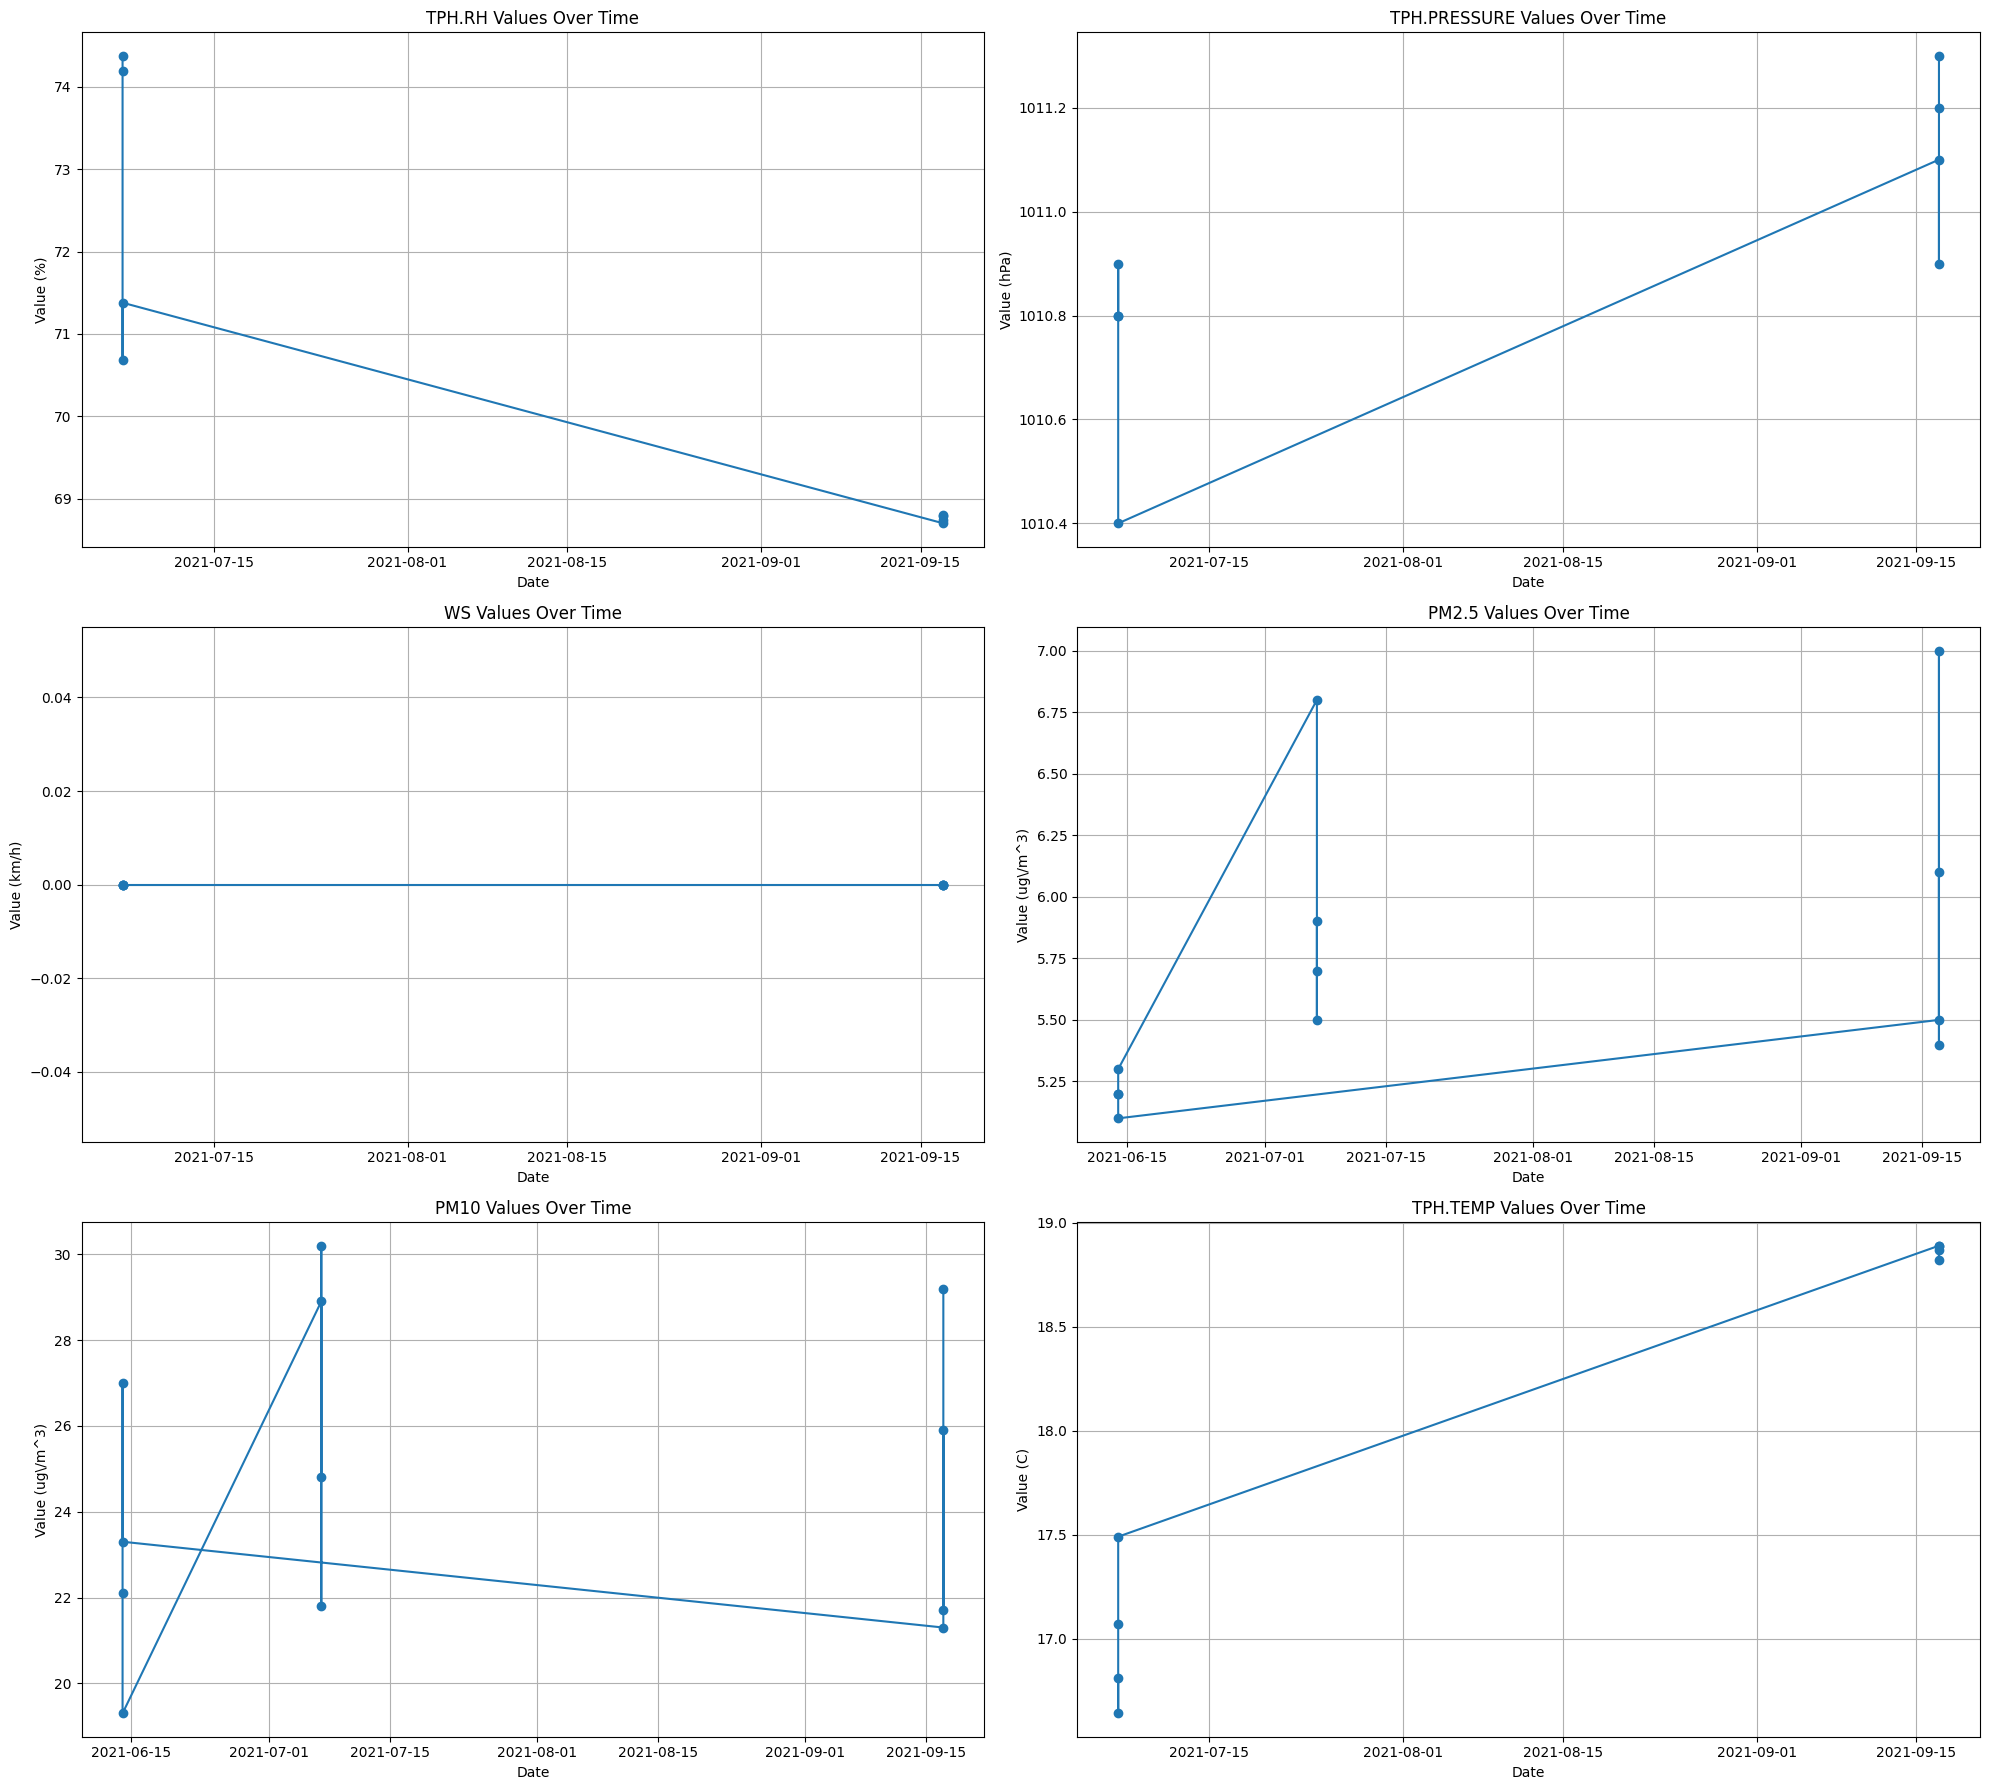

In [ ]:
# Print data from microclimate sensor
unique_types = microclimate_sensor_cleaned['type'].unique()
num_rows = (len(unique_types) + 1) // 2  # +1 to handle odd number of types
fig, axs = plt.subplots(num_rows, 2, figsize=(20, 6 * num_rows))

for i, sensor_type in enumerate(unique_types):
    type_data = microclimate_sensor_cleaned[microclimate_sensor_cleaned['type'] == sensor_type]
    row = i // 2
    col = i % 2
    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.plot(type_data['date'], type_data['value'], marker='o', linestyle='-')
    ax.set_title(f'{sensor_type} Values Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel(f'Value ({type_data["units"].iloc[0]})')  # Assuming 'units' column exists
    ax.grid(True)

plt.tight_layout()
plt.show()

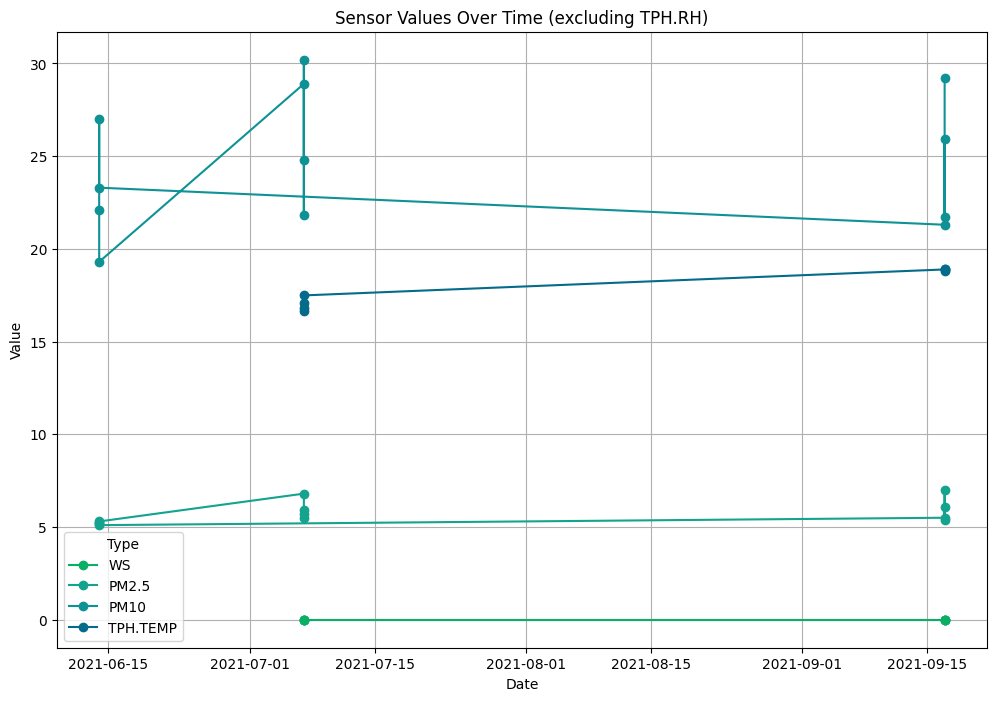

In [ ]:
# Exclude 'TPH.RH', 'TPH.PRESSURE' due to different metrics
color_l = [color_d[0], color_d[1], color_d[2], color_d[3], 'darkolivegreen', 'mediumseagreen', 'lightgreen', 'green', 'seagreen', 'forestgreen']

unique_types = microclimate_sensor_cleaned.loc[
    ~microclimate_sensor_cleaned['type'].isin(['TPH.RH', 'TPH.PRESSURE']), 'type'
].unique()
plt.figure(figsize=(12, 8))
for i, sensor_type in enumerate(unique_types):
    type_data = microclimate_sensor_cleaned[microclimate_sensor_cleaned['type'] == sensor_type]
    plt.plot(type_data['date'], type_data['value'], marker='o', linestyle='-', color=color_l[i % len(color_l)], label=sensor_type)

plt.title('Sensor Values Over Time (excluding TPH.RH)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Type')
plt.grid(True)
plt.show()

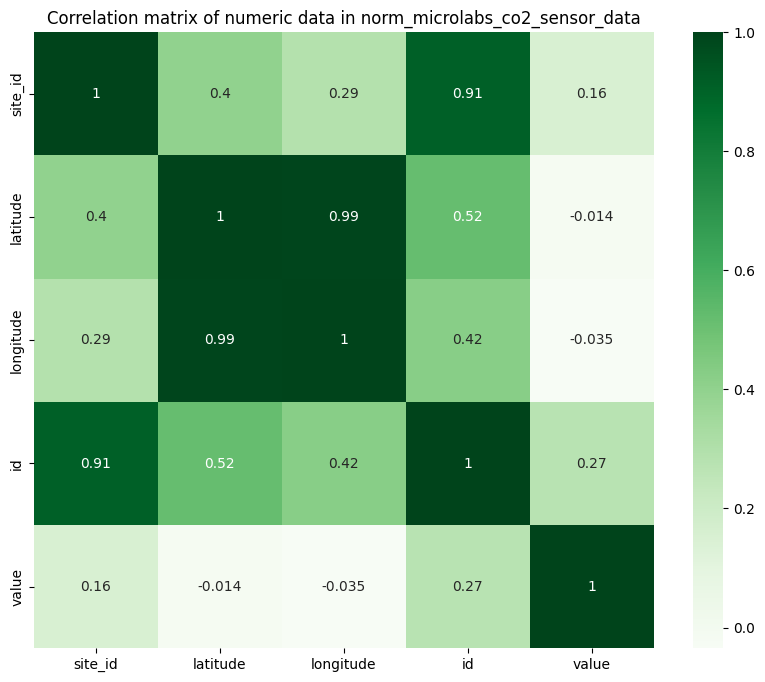

In [ ]:
# Heat Map for Correlation
# Ref https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
# Numeric columns for correlation
numeric_data = microclimate_sensor_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation matrix of numeric data in microclimate_sensor')
plt.show()

## Soil Sensor Data - temperature, humidity, light, co2


In [ ]:
df_soil_sensor_data_cleaned.head()

,local_time,site_name_x,site_id,id,probe_id,probe_measure,soil_value,unit,json_featuretype,site_name_y,property_name,latitude,longitude,location,time_diff
0,2022-12-31 13:00:00,Carlton Gardens North,64979,15522826,1306504,Soil Moisture 50cm #0,32.63,%VWC,SoilSensorData,Carlton Gardens North,Carlton Gardens North,-37.80170,144.97138,"-37.801699999983285, 144.9713799999935",0 days 00:00:00
1,2022-12-31 13:00:00,Alexandra Gardens Engineers Lawn,66195,15522987,1338740,Soil Temperature 50cm #0,21.36,ºC,SoilSensorData,Alexandra Gardens Engineers Lawn,Alexandra Gardens,-37.82073,144.97254,"-37.82072999998553, 144.97253999999268",0 days 00:00:00
2,2022-12-31 13:00:00,9th Fairway,64976,15515162,1320442,Soil Salinity 20cm #0,0.05,µS/cm,SoilSensorData,9th Fairway,Royal Park,-37.78292,144.95566,"-37.78291999998904, 144.95566000000628",0 days 00:00:00
3,2022-12-31 13:00:00,Shrine Reserve North East,64986,15521623,1305387,Soil Moisture 50cm #0,51.39,%VWC,SoilSensorData,Shrine Reserve North East,Shrine of Remembrance Reserve,-37.82921,144.97348,"-37.8292099999859, 144.97347999998564",0 days 00:00:00
4,2022-12-31 13:00:00,Carlton Gardens North,64979,15514301,1306520,Soil Temperature 30cm #0,20.63,ºC,SoilSensorData,Carlton Gardens North,Carlton Gardens North,-37.80170,144.97138,"-37.801699999983285, 144.9713799999935",0 days 00:00:00


In [ ]:
# Find unique data
df_soil_sensor_data['probe_measure'].unique()

array(['Soil Moisture 10cm (Adjusted)', 'Soil Moisture 50cm #0',
       'Soil Moisture 20cm (Adjusted)', 'Soil Temperature 50cm #0',
       'Soil Moisture 40cm', 'Soil Temperature 20cm #0',
       'Soil Salinity 20cm #0', 'Soil Temperature 40cm #0',
       'Soil Moisture 20cm #0 (Sand)', 'Soil Temperature 80cm #0',
       'Soil Moisture 80cm #0', 'Soil Salinity 60cm #0',
       'Soil Temperature 70cm #0', 'Soil Temperature 30cm #0',
       'Soil Moisture 40cm #0 (Clay)', 'Soil Temperature 60cm #0',
       'Soil Moisture 40cm #0', 'Soil Salinity 30cm #0',
       'Soil Moisture 40cm (Adjusted)', 'Soil Temperature 20cm',
       'Soil Moisture 80cm', 'Soil Moisture 60cm #0 (Sand)',
       'Soil Moisture 10cm #0 (Sand)', 'Soil Moisture 70cm #0 (Sand)',
       'Soil Moisture 70cm #0', '#0 Soil Moisture 60cm',
       'Soil Moisture 40cm #0 (Sand)', 'Soil Moisture 30cm',
       'Soil Temperature 10cm #0', 'Soil Moisture 10cm #0',
       'Soil Moisture 30cm (Adjusted)', 'Soil Temperature 30cm',

In [ ]:
moist_10 = df_soil_sensor_data[df_soil_sensor_data['probe_measure'] == 'Soil Moisture 010cm']
moist_10 = moist_10.sort_values(by='local_time')
moist_10 = moist_10.head(12)
moist_10

,local_time,site_name_x,site_id,id,probe_id,probe_measure,soil_value,unit,json_featuretype,site_name_y,latitude,longitude,location,time_diff
2351531,2022-12-31 14:30:00,Southbank Bvd Playspace,126588,15523945,2239492,Soil Moisture 010cm,48.51,%VWC,SoilSensorData,Southbank Bvd Playspace,-37.823107,144.965059,"-37.8231069999863, 144.96505949997135",0 days
2310462,2022-12-31 15:00:00,Southbank Bvd Playspace,126588,15524445,2239492,Soil Moisture 010cm,48.30,%VWC,SoilSensorData,Southbank Bvd Playspace,-37.823107,144.965059,"-37.8231069999863, 144.96505949997135",0 days
2323547,2022-12-31 15:30:00,Southbank Bvd Playspace,126588,15524449,2239492,Soil Moisture 010cm,52.84,%VWC,SoilSensorData,Southbank Bvd Playspace,-37.823107,144.965059,"-37.8231069999863, 144.96505949997135",0 days
2310425,2022-12-31 16:00:00,Southbank Bvd Playspace,126588,15524159,2239492,Soil Moisture 010cm,52.45,%VWC,SoilSensorData,Southbank Bvd Playspace,-37.823107,144.965059,"-37.8231069999863, 144.96505949997135",0 days
2310463,2022-12-31 16:30:00,Southbank Bvd Playspace,126588,15524457,2239492,Soil Moisture 010cm,52.03,%VWC,SoilSensorData,Southbank Bvd Playspace,-37.823107,144.965059,"-37.8231069999863, 144.96505949997135",0 days
2310471,2022-12-31 17:00:00,Southbank Bvd Playspace,126588,15524528,2239492,Soil Moisture 010cm,51.43,%VWC,SoilSensorData,Southbank Bvd Playspace,-37.823107,144.965059,"-37.8231069999863, 144.96505949997135",0 days
2350871,2022-12-31 17:30:00,Southbank Bvd Playspace,126588,15524154,2239492,Soil Moisture 010cm,51.04,%VWC,SoilSensorData,Southbank Bvd Playspace,-37.823107,144.965059,"-37.8231069999863, 144.96505949997135",0 days
2323546,2022-12-31 18:00:00,Southbank Bvd Playspace,126588,15524444,2239492,Soil Moisture 010cm,50.65,%VWC,SoilSensorData,Southbank Bvd Playspace,-37.823107,144.965059,"-37.8231069999863, 144.96505949997135",0 days
2323549,2022-12-31 18:30:00,Southbank Bvd Playspace,126588,15524468,2239492,Soil Moisture 010cm,50.20,%VWC,SoilSensorData,Southbank Bvd Playspace,-37.823107,144.965059,"-37.8231069999863, 144.96505949997135",0 days
2350821,2022-12-31 19:00:00,Southbank Bvd Playspace,126588,15523999,2239492,Soil Moisture 010cm,49.62,%VWC,SoilSensorData,Southbank Bvd Playspace,-37.823107,144.965059,"-37.8231069999863, 144.96505949997135",0 days


#### Merging datasets
- Given the soil-sensor-locations has fewer records but almost one unique site_id per record, it suggests that it acts as a master list of locations.
- The historical readings dataset has many more records, indicative of time-series data for these sites.

### Part 2 Integrated Data Dashboard:

- Create a dashboard displaying data from all sensors, including soil conditions, microclimate, and CO2 levels. Visualizations include maps, charts, and graphs.

In [ ]:
soil_df['probe_measure'].unique()

In [ ]:
moist_10 = soil_df[soil_df['probe_measure'] == 'Soil Moisture 010cm']
moist_10 = moist_10.sort_values(by='local_time')
moist_10 = moist_10.head(12)
moist_10

In [ ]:
moist_20 = soil_df[soil_df['probe_measure'] == 'Soil Moisture 020cm']
moist_20 = moist_20.sort_values(by='local_time')
moist_20 = moist_20.head(11)

In [ ]:
moist_30 = soil_df[soil_df['probe_measure'] == 'Soil Moisture 030cm']
moist_30 = moist_30.sort_values(by='local_time')
moist_30 = moist_30.head(6)

In [ ]:
moist_40 = soil_df[soil_df['probe_measure'] == 'Soil Moisture 040cm']
moist_40 = moist_40.sort_values(by='local_time')
moist_40 = moist_40.head(12)

In [ ]:
moist_50 = soil_df[soil_df['probe_measure'] == 'Soil Moisture 050cm']
moist_50 = moist_50.sort_values(by='local_time')
moist_50 = moist_50.head(11)

In [ ]:
moist_60 = soil_df[soil_df['probe_measure'] == 'Soil Moisture 060cm']
moist_60 = moist_60.sort_values(by='local_time')
moist_60 = moist_60.head(5)

In [ ]:
moist_70 = soil_df[soil_df['probe_measure'] == 'Soil Moisture 070cm']
moist_70 = moist_70.sort_values(by='local_time')
moist_70 = moist_70.head(7)

In [ ]:
moist_80 = soil_df[soil_df['probe_measure'] == 'Soil Moisture 080cm']
moist_80 = moist_80.sort_values(by='local_time')
moist_80 = moist_80.head(6)

In [ ]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(15, 7.5))

ax.plot(moist_10['local_time'], moist_10['soil_value'], label = 'moist_10')
ax.plot(moist_20['local_time'], moist_20['soil_value'], label = 'moist_20')
ax.plot(moist_30['local_time'], moist_30['soil_value'], label = 'moist_30')
#ax.plot(moist_40['local_time'], moist_40['soil_value'], label = 'moist_40')
#ax.plot(moist_50['local_time'], moist_50['soil_value'], label = 'moist_50')
#ax.plot(moist_60['local_time'], moist_60['soil_value'], label = 'moist_60')
#ax.plot(moist_70['local_time'], moist_70['soil_value'], label = 'moist_70')
#ax.plot(moist_80['local_time'], moist_80['soil_value'], label = 'moist_80')


ax.set_xlabel("Date and Time")
ax.set_ylabel("Soil Moisture Value")
ax.set_title("Soil Moisture Southbank Bvd Playspace", y=1.1, fontsize=15)

ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.legend()
plt.show()

In [ ]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(15, 7.5))

ax.plot(moist_10['local_time'], moist_10['soil_value'])

ax.set_xlabel("Date and Time")
ax.set_ylabel("Soil Moisture Value")
ax.set_title("Soil Moisture 10cm Southbank Bvd Playspace", y=1.1, fontsize=15)

ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

In [ ]:
dataset = 'soil-sensor-locations'
soil_loc = extract_dataframe(base_url, dataset)

In [ ]:
base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'

#Dataset name
dataset = 'soil-sensor-locations' 'microclimate-sensor-readings'
number_of_records = 84

# Add a filter for the number of results returned
filters = f'records?limit={number_of_records}&offset=0&timezone=UTC'

soil_loc_url = f'{base_url}{dataset}/{filters}'
soil_loc_url

result = requests.get(soil_loc_url)
result_json = result.json()
records = result_json['results']
soil_loc = pd.json_normalize(records)

In [ ]:
soil_loc

In [ ]:
soil_loc['latitude'] = soil_loc['latitude'].astype(float)
soil_loc['longitude'] = soil_loc['longitude'].astype(float)

In [ ]:
# Create a base map
m = folium.Map(location=[soil_loc['latitude'].mean(), soil_loc['longitude'].mean()], zoom_start=15)

# Add markers for each sensor site
for _, row in soil_loc.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Site ID: {row['site_id']}<br>Site Name: {row['site_name']}<br>Property Name: {row['property_name']}",
        icon=folium.Icon(icon="cloud"),
    ).add_to(m)

In [ ]:
m

### Part 3 Predictive Analytics Model:
- Develop a model to predict environmental conditions and alert for anomalies or hazardous conditions based on historical and current sensor data.

### Part 4 Data Quality Report:
- Generate a report detailing data completeness, accuracy, and anomalies across datasets, highlighting any gaps or inconsistencies.

### Part 5 Documentation
- Detailed guide on accessing, filtering, and interpreting the data, including how to use the API to download specific sensor readings.